# Supporting files
Methods for setting axes, saving, exporting to files

In [13]:
import matplotlib.pyplot as plt
from common import plotter
plt.style.use("my_official")

In [89]:
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}

# Curvature at the flat regions
> `curvature.py`

Generates parameters for the curvature in different papers

In [ ]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

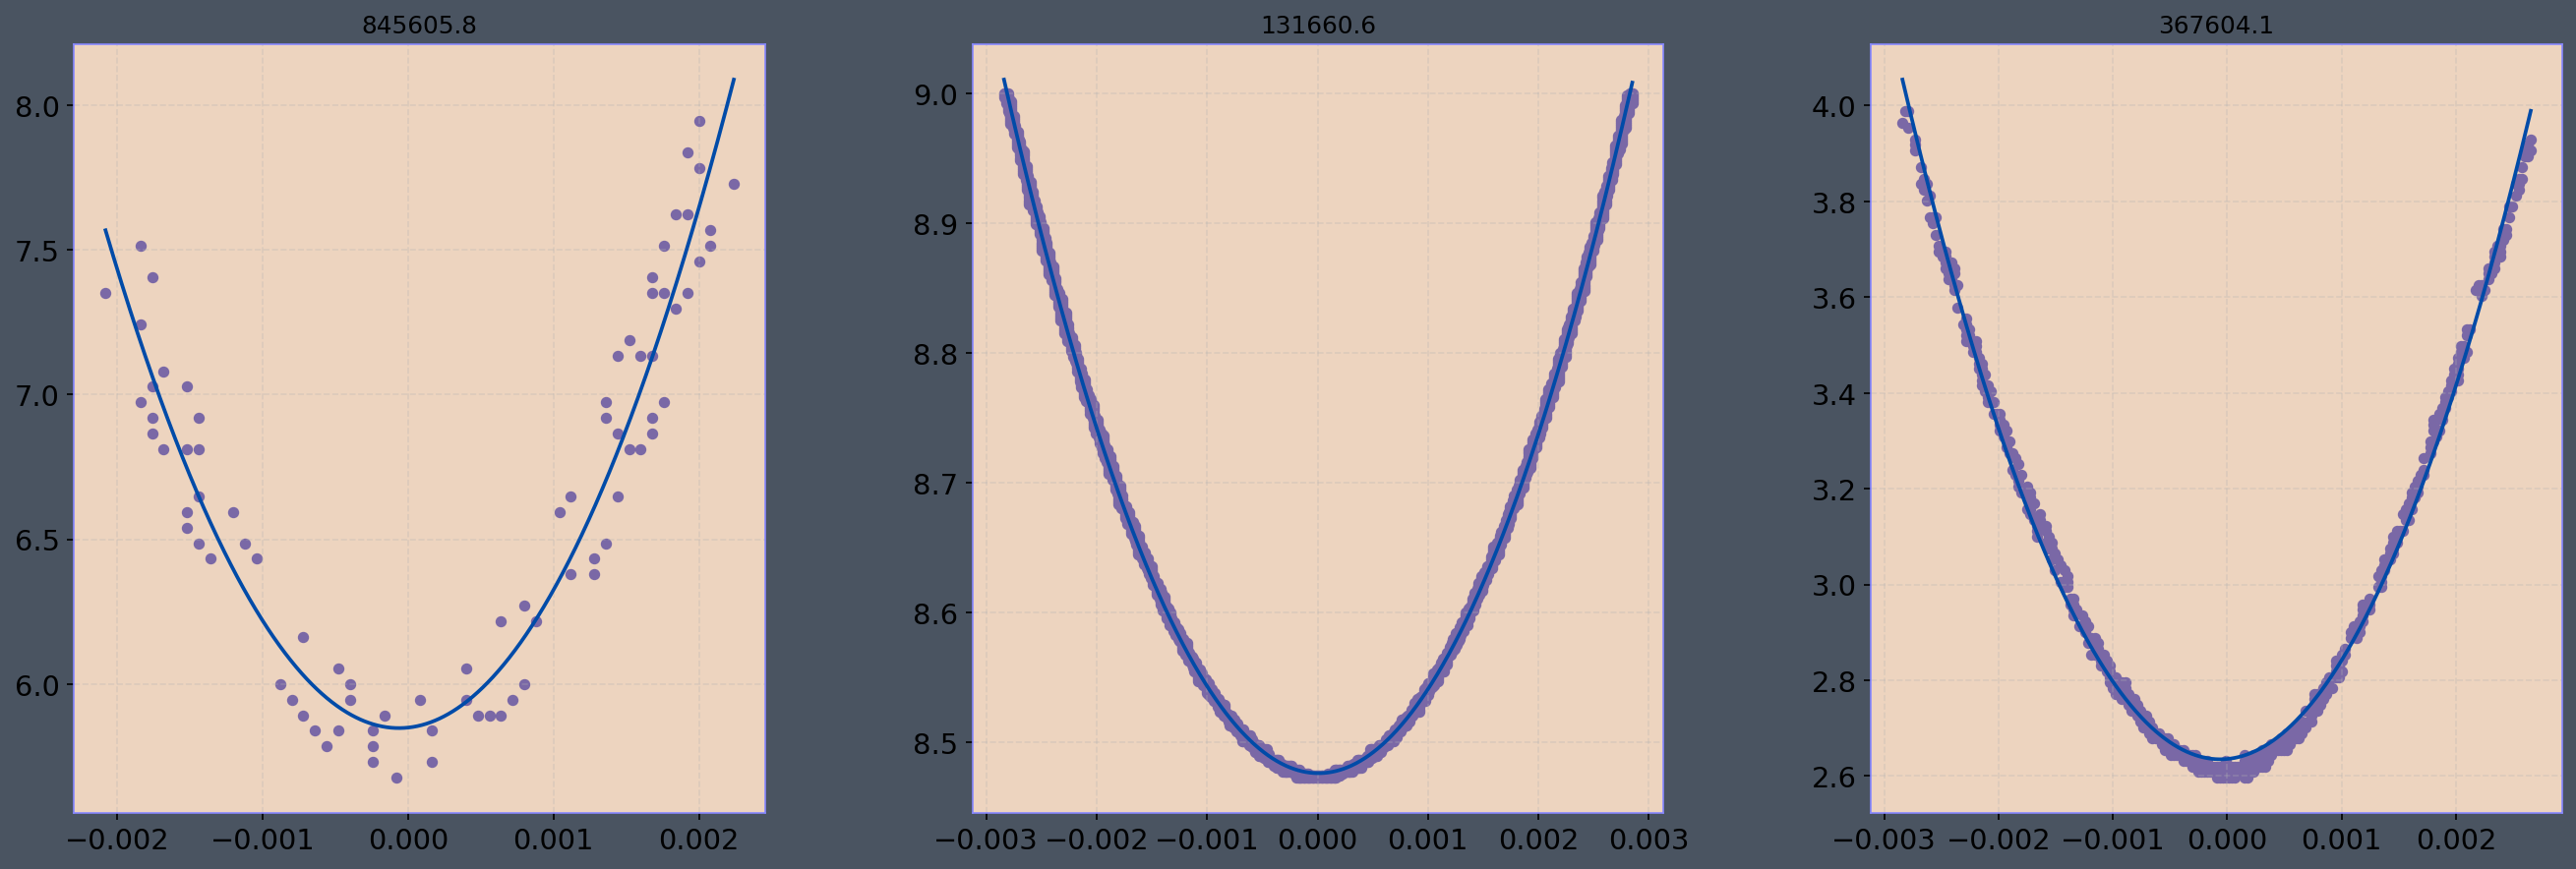

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots
> `graph_analysis.py`

**Generates**
- `fig2_spectrum_dip.svg`: fit to the transmission dip
- `fig5_rabi.svg` oscillations

Gamma1   2.52596682673479
Gamma2:  4.983956296090957e-07
Omega:   6.2148193139220025
Offset:  10.045562154677716


<IPython.core.display.Javascript object>


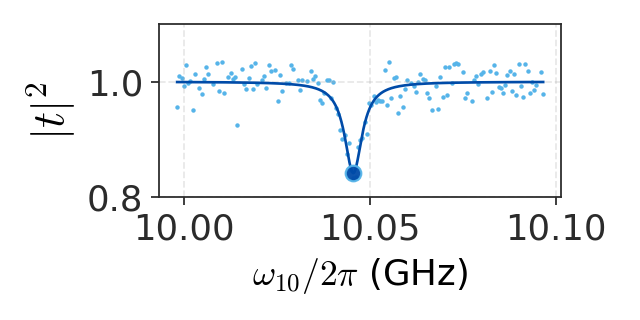

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from experimental_analysis.transmission_fitter import TransmissionFitter
from common import plotter

transmission_fitter = TransmissionFitter()

# 1 - load data and filter outliers
transmission_fitter.load_data("data/extinction_smith27.txt", 0, 1, convert_to_ghz=True)
transmission_fitter.filter(0.8, 10 ** 12, 0, 1.035)

# 2 - perform fitting
(gamma1, gamma2, omega, offset) = transmission_fitter.fit()

# 3 - visualise the fit
x_array_to_plot = np.linspace(min(transmission_fitter.transmission_x),
                      max(transmission_fitter.transmission_x), 500)
y_array_to_plot = transmission_fitter.fit_function(x_array_to_plot,
                                                gamma1, gamma2, omega, offset)
dip_index = np.argmin(y_array_to_plot)
x_dip = x_array_to_plot[dip_index]
y_dip = y_array_to_plot[dip_index]

# 3 - plot
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.scatter(transmission_fitter.transmission_x, transmission_fitter.transmission_y, marker=".", color="C2")
ax.plot(x_array_to_plot, y_array_to_plot, color="C9")
ax.plot(x_dip, y_dip,
               marker="o", color="#004BA8", markeredgecolor="C2",
               markersize=7, alpha=0.95,linestyle="")
ax.set_xlabel("$\omega_{10}/ 2 \pi$ (GHz)", fontsize=16)
ax.set_ylabel("$|t|^2$", fontsize=20)
ax.set_ylim([0.8, 1.1])
ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum_dip", "svg")

# Fitting the spectrum
Generates:
- `fitting_spectrum.svg`
- `fitting_spectrum_zoomed.svg`

In [43]:
%matplotlib notebook
import logging
import numpy as np
from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(-3, 3, 1000)
EC = 13.5
EJ = 92

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16


> Plot along with experimental results

<IPython.core.display.Javascript object>


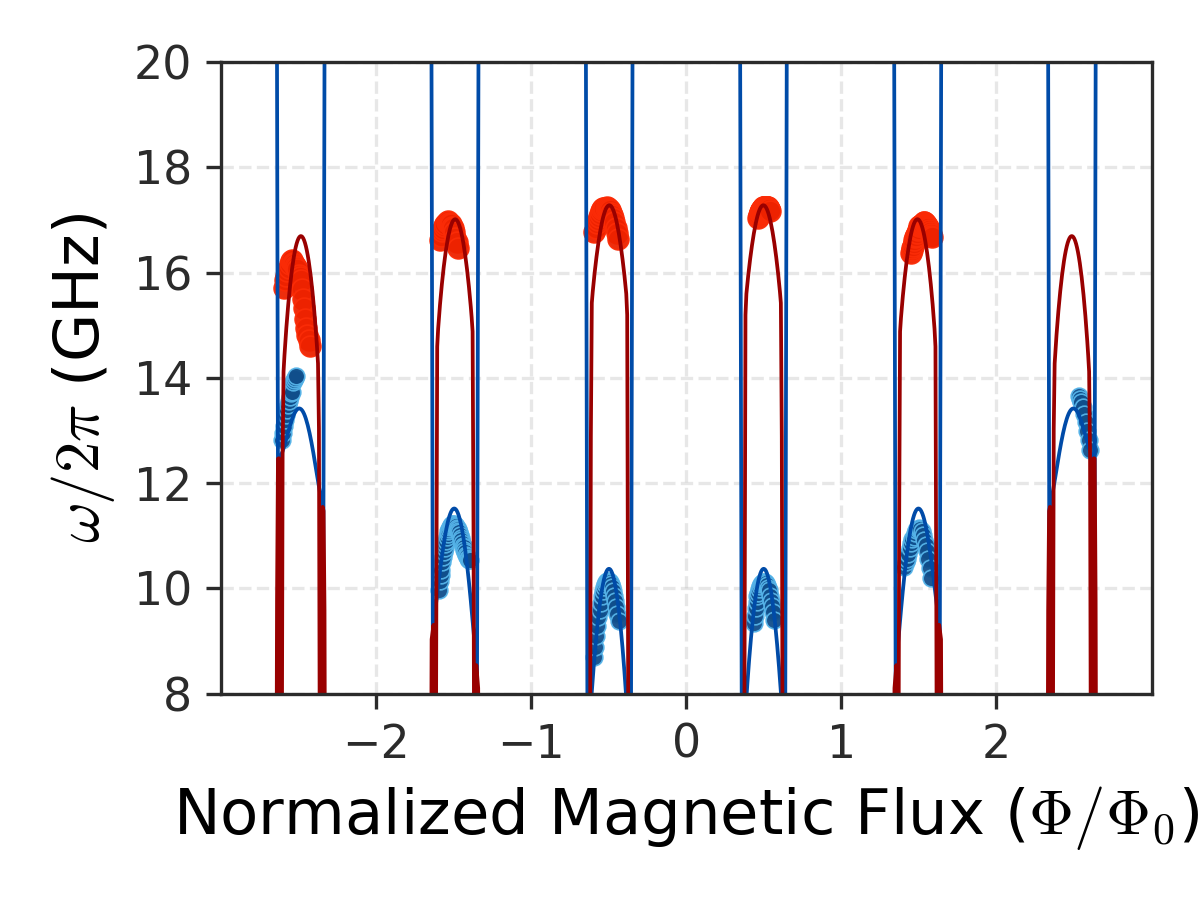

In [53]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from experimental_analysis.two_tone_data import TwoToneData
from common import plotter

two_tone_data = TwoToneData()
# 1 - load the experminetal data
two_tone_data.load_data(base_file_name="data/Qubit15_5JJ_Q2", 
                       offset=0.125,
                       period=0.7)

# 2 - plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
        marker="o", 
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2", 
        markeredgewidth="0.4", markersize=4, alpha=0.95, 
        linestyle="")
ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
        marker="o", 
        color=MY_COLOURS["DarkRed"],
        markeredgecolor="#fb2c07", 
        markeredgewidth="0.4", 
        markersize=5, 
        alpha=0.95,
        linestyle="")

ax.plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([-3, 3])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim([8, 20])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum", "svg")

> Zoomed in

<IPython.core.display.Javascript object>


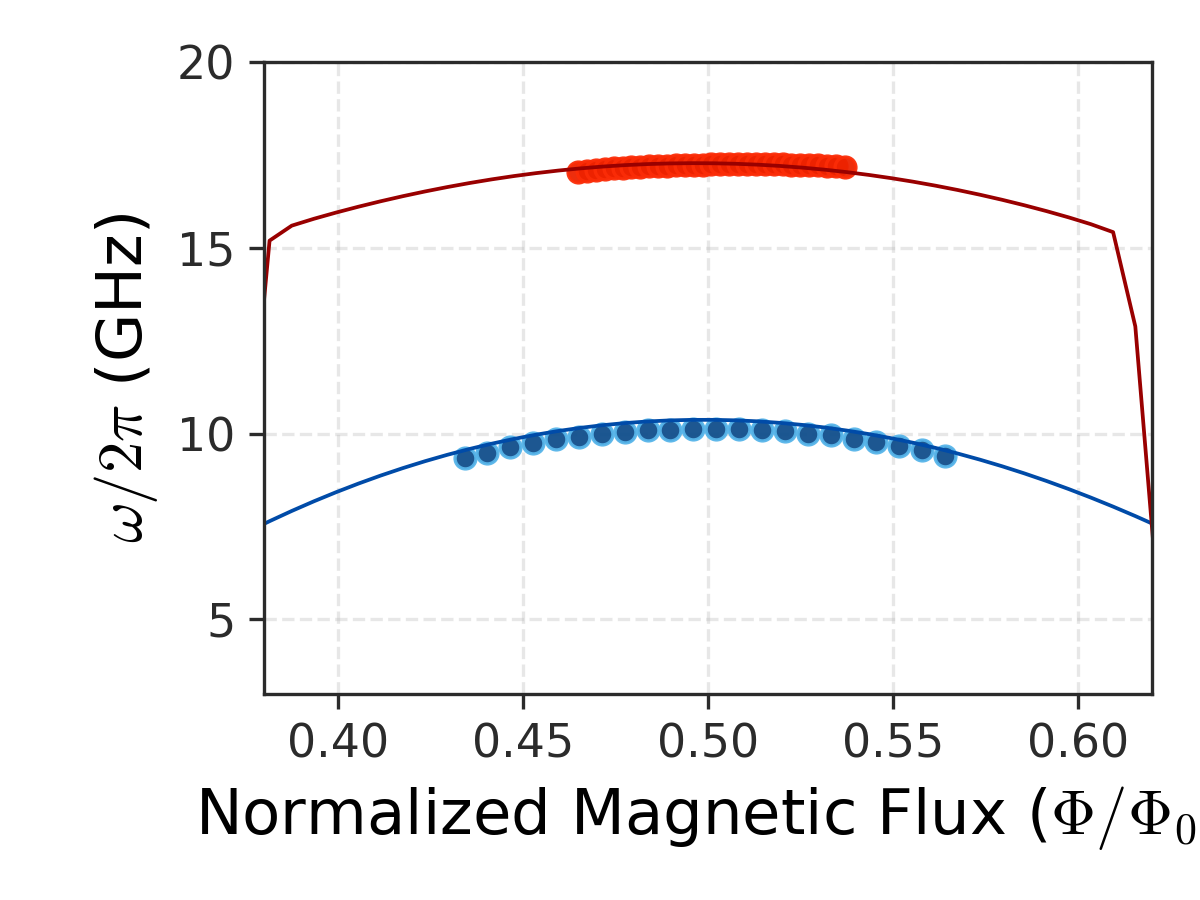

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
        marker="o", color=MY_COLOURS["DarkBlue"], markeredgecolor="C2", markeredgewidth="0.8", markersize=5, alpha=0.95, 
        linestyle="")
ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
        marker="o", color=MY_COLOURS["DarkRed"], markeredgecolor="#fb2c07", markeredgewidth="0.8", markersize=5, alpha=0.95,
        linestyle="")

ax.plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([0.38, 1 - 0.38])
ax.set_ylim([3, 20])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum_zoomed", "svg")

# Plot of analytical spectrum and matrix elements

In [33]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from quantum_builder import QuantumBuilder


QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 3,
}
FLUX_NUMBER = np.linspace(0.35, 0.65, 500)
EC = 13.5
EJ = 91

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


## Plot the sparse matrix to make sure we build correctly

<IPython.core.display.Javascript object>


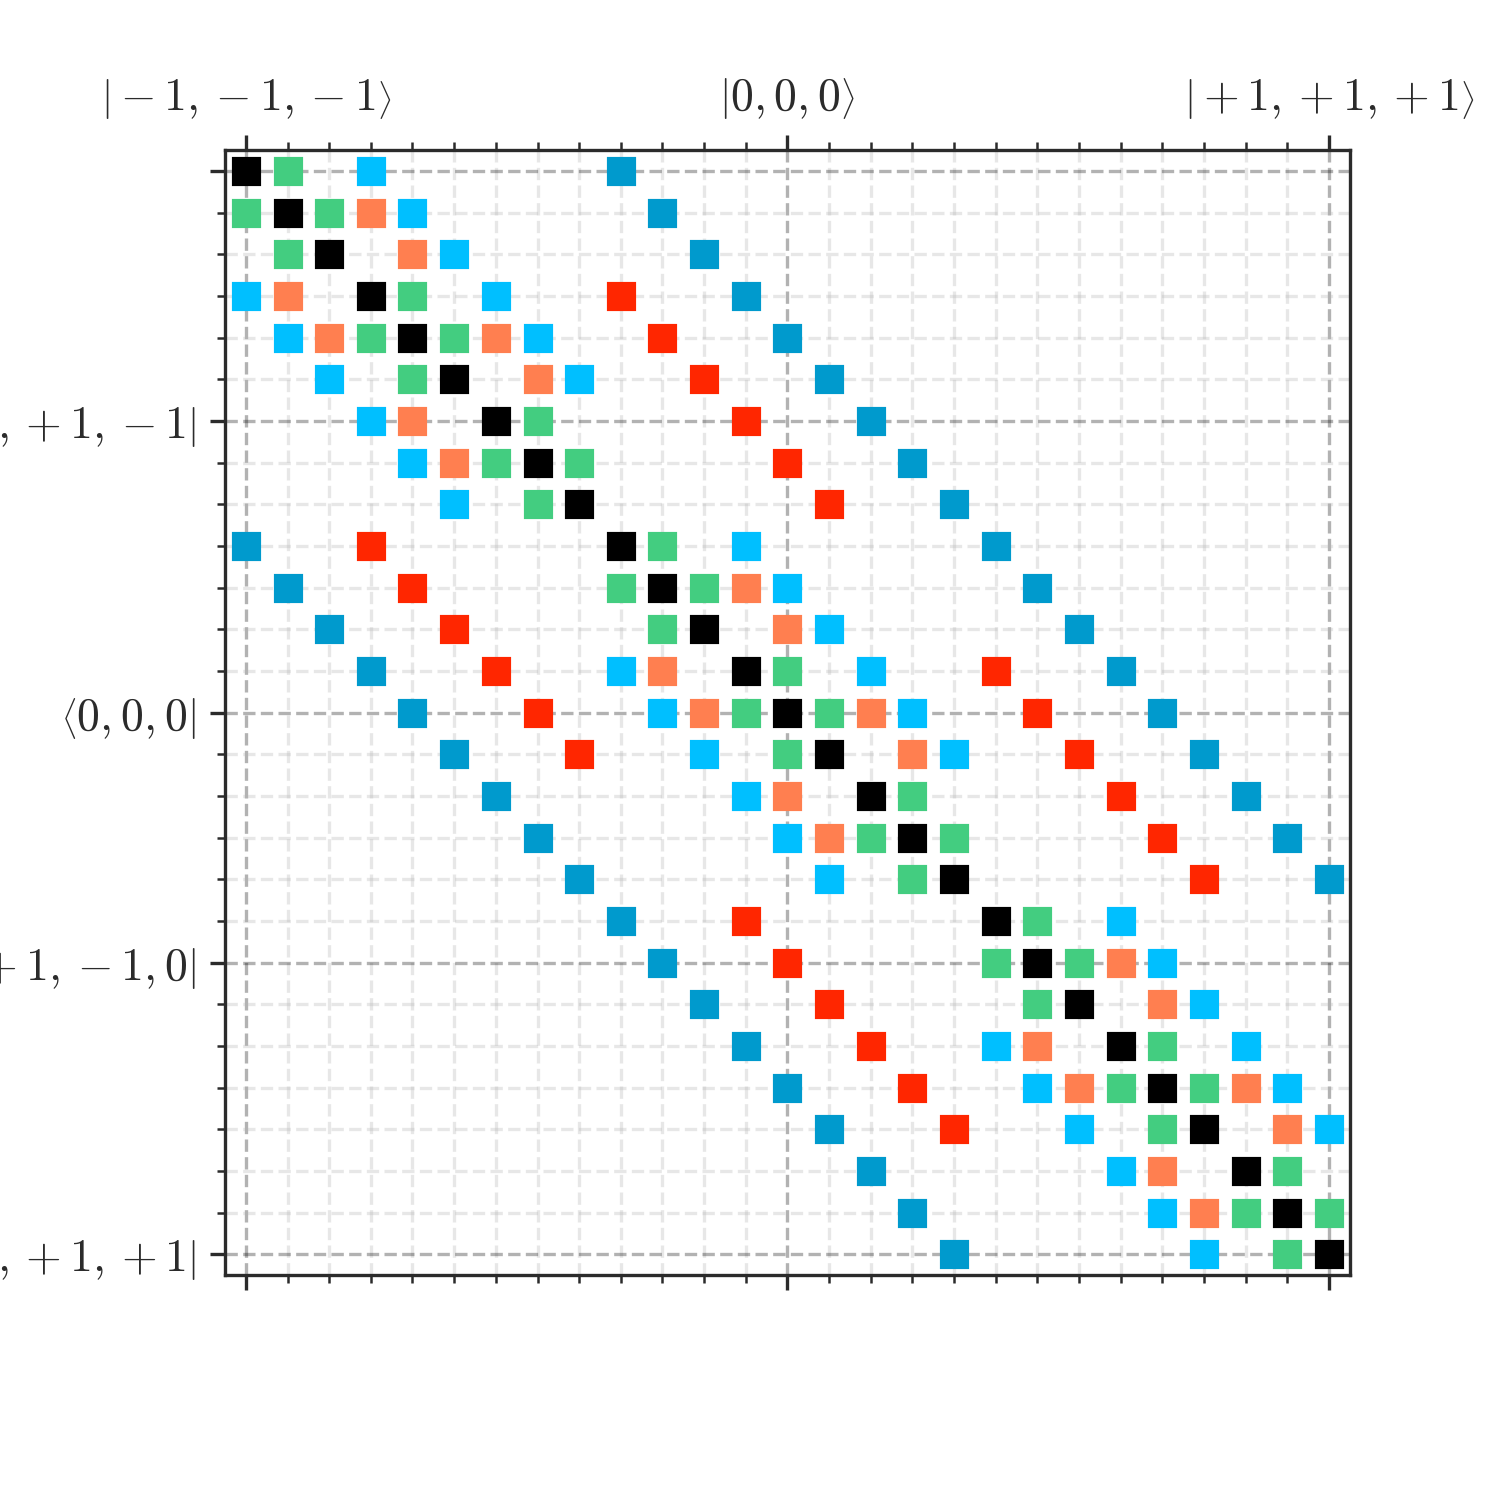

In [40]:
if QUBIT_PARAMETERS["states_per_island"] < 7:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()
    twin_qubit.plot_sparse_matrix(ax)
    ax.grid(b=True, which='major', color="black")
    ax.grid(b=True, which='minor')
    ax.set_xlim([-0.5, 27 - 0.5])
    ax.set_ylim([27 - 0.5, -0.5])

    # # 5 - add the ticks
    ax.set_xticks(np.linspace(
        0, 26, 27), minor=True)
    ax.set_yticks(np.linspace(
        0, 26, 27), minor=True)

    ax.set_xticks([0, 13, 26])
    xticklabels = [""] * 3
    xticklabels[0] = r"$\left|-1, -1, -1 \right\rangle$"
    xticklabels[1] = r"$\left|0, 0, 0 \right\rangle$"
    xticklabels[2] = r"$\left|+1, +1, +1 \right\rangle$"

    ax.set_yticks([0, 6, 13, 19, 26])
    yticklabels = [""] * 5
    yticklabels[1] = r"$\left\langle -1, +1, -1 \right|$"
    yticklabels[2] = r"$\left\langle 0, 0, 0 \right|$"
    yticklabels[3] = r"$\left\langle +1, -1, 0 \right|$"
    yticklabels[4] = r"$\left\langle +1, +1, +1 \right|$"

    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    plt.savefig(f"./output/matrix_visualisation.svg", transparent=True)
else:
    logging.info("Skipping plotting matrix as it is very large")

## Plot of the analytical spectrum
> Old notation used here

<IPython.core.display.Javascript object>


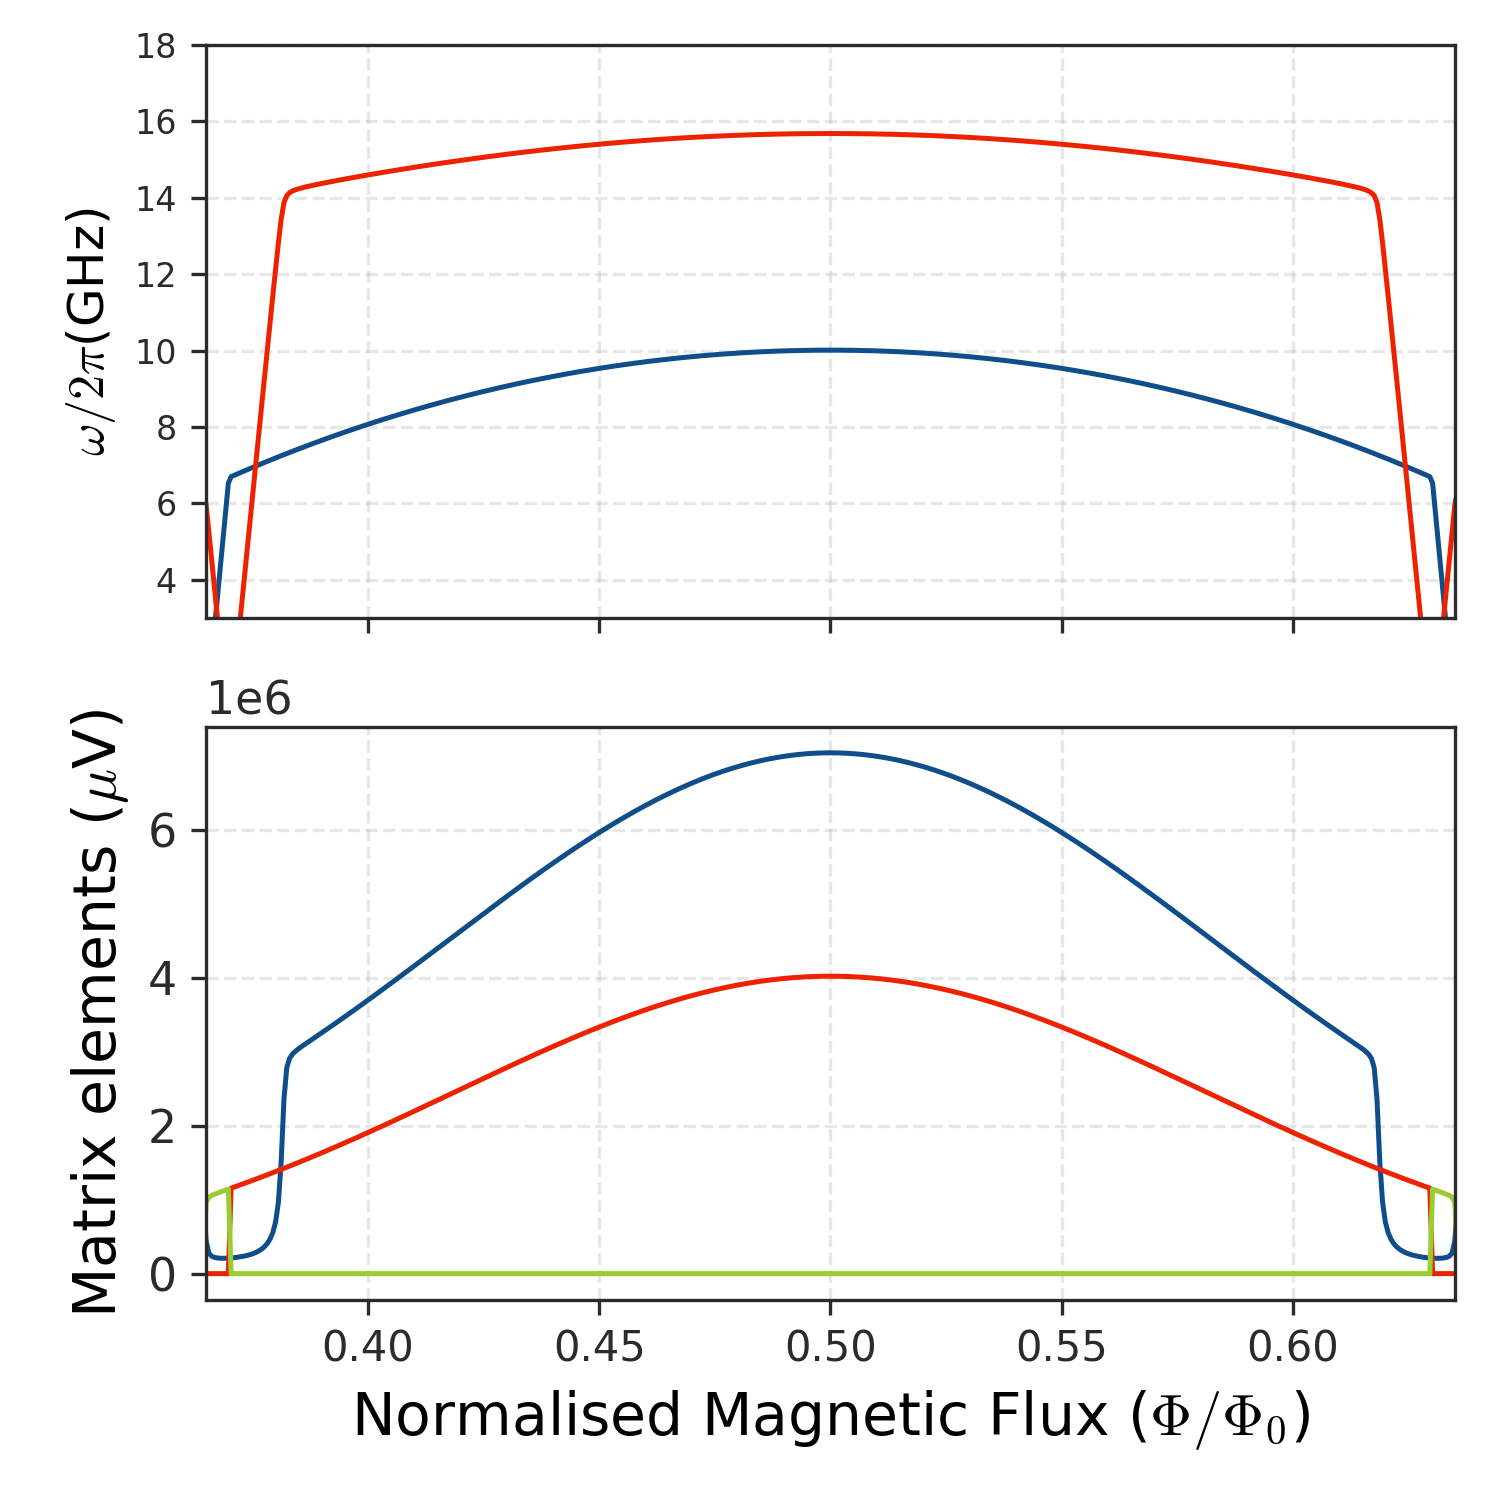

In [90]:
fig = plt.figure(figsize=(5, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
# ax[0].plot(|?
#     phi_r / (2 * pi), 
#                simulation_dictionary_for_transition_matrix["eigvals"][phiminus_index_at_zero, :,idx],
#                color=COLOUR_SCHEME[idx]
# )
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color=MY_COLOURS["DarkBlue"])
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color=MY_COLOURS["DarkRed"])
ax[0].set_ylabel(r"$\omega/2\pi$(GHz)", fontsize=12)
ax[0].set_ylim([3, 18])
# ax[0].set_yticks([3, 5, 10, 15, 18])

ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color=MY_COLOURS["DarkBlue"])
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color=MY_COLOURS["DarkRed"])
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color=MY_COLOURS["Green"])
ax[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=14)
ax[1].set_xlim([0.365, 0.635])

plt.tight_layout()
plt.show()

## Add the assymetric results

In [78]:
QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 2,
    "states_per_island": 9,
}
twin_qubit_ass = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_ass.override_parameters(EC=EC, EJ=EJ)
twin_qubit_ass.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


<IPython.core.display.Javascript object>


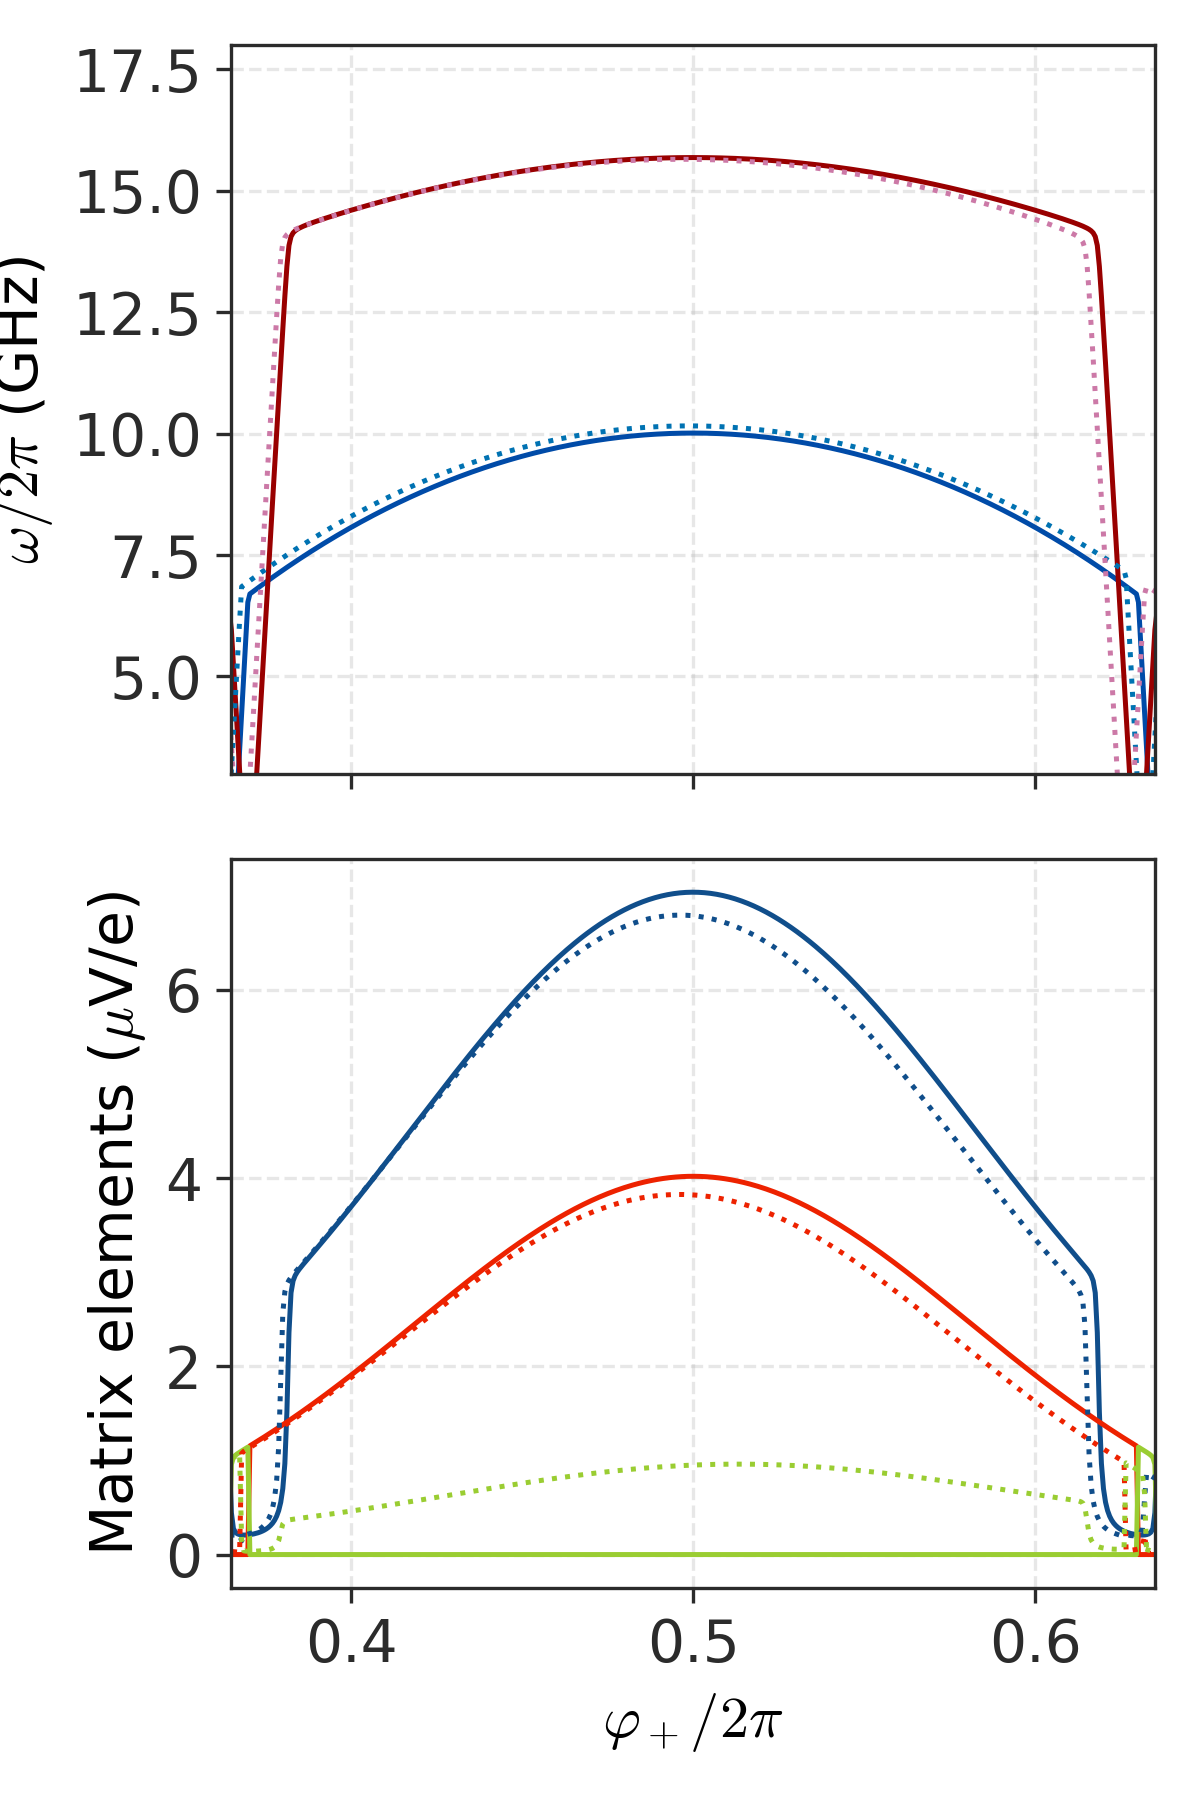

In [115]:
fig_ass = plt.figure(figsize=(4, 6))
ax_ass = fig_ass.subplots(nrows=2, ncols=1, sharex=True)

ax_ass[0].tick_params(labelsize=18)
ax_ass[1].tick_params(labelsize=18)


ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0")
ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4")
ax_ass[0].set_ylabel("$\omega/2\pi$ (GHz)", fontsize=14)
ax_ass[0].set_ylim([3, 18])
# ax_ass[0].set_yticks([3, 5, 7.5, 10, 12.5, 15, 17.5])

ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]), color=MY_COLOURS["DarkBlue"])
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]), color=MY_COLOURS["DarkRed"])
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]), color=MY_COLOURS["Green"])
ax_ass[1].set_xlabel(r"$\varphi_+/2\pi$", fontsize=14)
ax_ass[1].set_ylabel(r"Matrix elements ($\mu$V/e)", fontsize=14)
ax_ass[1].set_xlim([0.365, 0.635])

ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["1-2"], color="C1", linestyle=":")
ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["2-3"], color="C5", linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d32"]), color=MY_COLOURS["DarkBlue"], linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d21"]), color=MY_COLOURS["DarkRed"], linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d13"]), color=MY_COLOURS["Green"], linestyle=":")

ax_ass[1].xaxis.set_tick_params(labelsize=14)
ax_ass[1].yaxis.set_tick_params(labelsize=14)
ax_ass[0].xaxis.set_tick_params(labelsize=14)
ax_ass[0].yaxis.set_tick_params(labelsize=14)

plt.tight_layout()
plt.show()

In [116]:
plt.savefig(f"./output/theoretical_transition_dipole_simulations.svg", transparent=True)

# Investigating discerpancy with MatLab
- Remember that Matlab has strange indexing, and make sure to write matlab correctly

In [15]:
def load_matlab_27_row_col(file: str, second_col_type=int):
    "row, col, bloat"
    row_col_set = []
    with open(file, "r") as fin:
        for idx, line in enumerate(fin.readlines()):
            split_line = line.replace("\n","").replace("i", "j").split(",")
            row_col_set.append((int(split_line[0]), second_col_type(split_line[1])))
    return set(row_col_set)

def load_matlab_27_complex(file: str):
    "row, col, complex-value"
    matlab_array = np.zeros((27), dtype=np.complex)
    with open(file, "r") as fin:
        for line in fin.readlines():
            split_line = line.replace("\n","").replace("i", "j").split(",")
            x = int(split_line[0])
            z = np.complex(split_line[1])
            matlab_array[x] = z
    return matlab_array

def load_matlab_27_by_27_complex(file: str):
    "row, col, complex-value"
    matlab_array = np.zeros((27, 27), dtype=np.complex)
    with open(file, "r") as fin:
        for line in fin.readlines():
            split_line = line.replace("\n","").replace("i", "j").split(",")
            x = int(split_line[0])
            y = int(split_line[1])
            z = np.complex(split_line[2])
            matlab_array[x][y] = z
    return matlab_array

def print_differences_2d_array(array_a, array_b, abs_tolerance = 0.01):
    print("🐳 Printing differences in 2d arrays")
    x_diff_idx, y_diff_idx = np.nonzero(
        array_a - array_b
    )
    counter = 0
    for (x, y) in zip(x_diff_idx, y_diff_idx):
        if (
            np.abs(
                np.abs(np.real(array_a[x][y])) - 
                np.abs(np.real(array_b[x][y]))
            ) > abs_tolerance
            or 
            np.abs(
                np.abs(np.imag(array_a[x][y])) - 
                np.abs(np.imag(array_b[x][y]))
            ) > abs_tolerance
           ):
            print(f"{x:5} - {y:<5}Left: {array_a[x][y]:<30}Right:{array_b[x][y]}")
            counter += 1
    print(f"Total differences: {counter}")
        
def print_differences_1d_array(array_a, array_b, abs_tolerance = 0.01):
    print("🐳 Printing differences in 1d arrays")
    for (idx, (x, y)) in enumerate(zip(array_a, array_b)):
        if np.abs(x - y) > abs_tolerance and np.abs(x + y) > abs_tolerance:
            print(f"{idx:<5}Left: {array_a[idx]:<30}Right:{array_b[idx]}")

In [16]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import matplotlib.pyplot as plt
plt.style.use("my_official")
from matplotlib import cm
import matplotlib as mpl
import scipy

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

from quantum_builder import QuantumBuilder

In [17]:
phi_l = 0.4 * 2 * pi
phi_r = 0.4 * 2 * pi

EC = 13.5
EJ = 91
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 3,
}
# Build Hamiltonian
twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, [], logging_level=logging.WARNING, other_parameters=""
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

# Dirty sub
self = twin_qubit
self.twin_qubit_hamiltonian_manager.stage2_prepare_constant_hamiltonian()
self.twin_qubit_hamiltonian_manager.stage3_build_hamiltonian_for_simulation(
    phi_l,  # in Matlab it is f
    phi_r #in matlab it is f1
)

## Check Hamiltonian by parts
> As changes were made to the indexing, some of the columns may be different now

In Matlab `f=`$\varphi_l$ and `f1=`$\varphi_r$
- [x] Diagonal charge is OK
- [x] $\varphi_{02}$ is OK
- [x] $\varphi_{01}$ and $\varphi_{03}$ where switched positions
- [x] $+i\left[\varphi_{02} - \varphi_{01} - \phi_l\right]$ is the P12
- [x] $-i\left[\varphi_{02} - \varphi_{01} - \phi_l\right]$ is the P21
- [x] $+i\left[\varphi_{02} - \varphi_{03} + \phi_r\right]$ is the P23
- [x] $-i\left[\varphi_{02} - \varphi_{03} + \phi_r\right]$ is the P32

### Check $\varphi_{01}$ indexes

In [4]:
phi01_set_matlab = load_matlab_27_row_col("matlab_dumps/phi01_rows_and_cols.txt")

phi01_set_python = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi01"]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi01"]["col"]):
    phi01_set_python.append((row, col))
phi01_set_python = set(phi01_set_python)  

len_matlab = len(phi01_set_matlab)
len_python = len(phi01_set_python)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = phi01_set_python.symmetric_difference(phi01_set_matlab)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {phi01_set_matlab.difference(phi01_set_python)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {phi01_set_python.difference(phi01_set_matlab)}")

### Check $\varphi_{03}$ indexes

In [5]:
phi03_set_matlab = load_matlab_27_row_col("matlab_dumps/phi03_rows_and_cols.txt")

phi03_set_python = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi03"]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi03"]["col"]):
    phi03_set_python.append((row, col))
phi03_set_python = set(phi03_set_python)  

len_matlab = len(phi03_set_matlab)
len_python = len(phi03_set_python)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = phi03_set_python.symmetric_difference(phi03_set_matlab)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {phi03_set_matlab.difference(phi03_set_python)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {phi03_set_python.difference(phi03_set_matlab)}")

### Check $\varphi_{02} - \varphi_{01} + \varphi_l$ indexes

In [13]:
matlab_file = "matlab_dumps/phi12_rows_and_cols.txt"
python_dict = "+i(phi02-phi01-phi_l)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

In [14]:
matlab_file = "matlab_dumps/phi21_rows_and_cols.txt"
python_dict = "-i(phi02-phi01-phi_l)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

### Check $\varphi_{02} - \varphi_{03} + \varphi_r$ indexes

In [9]:
matlab_file = "matlab_dumps/phi23_rows_and_cols.txt"
python_dict = "+i(phi02-phi03+phi_r)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

In [10]:
matlab_file = "matlab_dumps/phi32_rows_and_cols.txt"
python_dict = "-i(phi02-phi03+phi_r)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

## Check Hamiltonian Full

In [97]:
# Check Hamiltonian
print_differences_2d_array(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt"),
    np.array(
       self.twin_qubit_hamiltonian_manager.hamiltonian_simulation.todense()
    ),
    abs_tolerance=0.01
)

🐳 Printing differences in 2d arrays
Total differences: 0


## Check voltage operator

In [98]:
# Check V02 - we need a prefix of x2
(voltage_matrix, _) = self.twin_qubit_operator_builder.build()
print_differences_2d_array(
    load_matlab_27_by_27_complex("matlab_dumps/voltage_matrix.txt"),
    np.array(
       voltage_matrix.todense()
    ) * 2
)

🐳 Printing differences in 2d arrays
Total differences: 0


## Check evaluation

In [19]:
# Evaluated with python
(eigvals_python, eigvecs_python) = scipy.linalg.eigh(
    self.twin_qubit_hamiltonian_manager.hamiltonian_simulation.todense()
)
eigvecs_python[0]

array([ 0.0278395 +0.j, -0.00903846-0.j, -0.10694635-0.j,  0.10649184+0.j,
       -0.00644703-0.j,  0.04983588+0.j, -0.30720622-0.j, -0.16077738-0.j,
       -0.05953668-0.j,  0.02473355+0.j, -0.15821282-0.j,  0.00890896+0.j,
        0.21409281+0.j,  0.45633226+0.j,  0.04272702+0.j,  0.11232514+0.j,
       -0.22372578-0.j,  0.49094659+0.j, -0.15649317-0.j,  0.02150692-0.j,
       -0.06609448-0.j, -0.12638369-0.j,  0.38449957-0.j, -0.11863537-0.j,
        0.06240457-0.j,  0.21664305-0.j, -0.08192704-0.j])

In [20]:
# Evalauted using matlab matrix
(eigvals_matlab, eigvecs_matlab) = scipy.linalg.eigh(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt")
)
eigvecs_matlab[0]

array([ 0.02783905+0.j, -0.00903982-0.j, -0.10694739-0.j,  0.1064912 +0.j,
       -0.00644867-0.j, -0.04983737-0.j, -0.30720607-0.j, -0.16077412-0.j,
       -0.05954132-0.j,  0.02473088+0.j, -0.1582116 -0.j, -0.0089121 -0.j,
        0.21408987+0.j, -0.4563338 -0.j,  0.0427177 +0.j,  0.11232434+0.j,
       -0.2237263 -0.j,  0.49094779-0.j, -0.15648987-0.j,  0.02150188-0.j,
       -0.06609532-0.j, -0.12638529-0.j,  0.38450075-0.j, -0.1186338 -0.j,
        0.06240493-0.j,  0.21664379-0.j, -0.08192726-0.j])

In [21]:
# Evaluated with python using sparse
(eigvals_python_sp, eigvecs_python_sp) = scipy.sparse.linalg.eigsh(
    self.twin_qubit_hamiltonian_manager.hamiltonian_simulation,
    5,
    which="SR",
    tol=0,
)
eigvecs_python_sp = np.transpose(eigvecs_python_sp)
eigvecs_python_sp[0]

array([-0.02698686-0.0068372j , -0.02195957-0.00207204j,
        0.03123114+0.05302724j, -0.06978157-0.01767937j,
       -0.23216062-0.13259704j, -0.15601427-0.15842169j,
        0.22832619+0.05784713j,  0.18945349+0.12037269j,
        0.03123114+0.05302724j, -0.02029712-0.00863382j,
        0.10361415+0.02625096j,  0.18945349+0.12037269j,
       -0.26728974+0.00605979j, -0.48551524-0.12300675j,
       -0.23216062-0.13259704j,  0.22391394-0.0156448j ,
        0.10361415+0.02625096j, -0.02195957-0.00207204j,
        0.05271223-0.03175993j,  0.22391394-0.0156448j ,
        0.22832619+0.05784713j, -0.21262535+0.06502574j,
       -0.26728974+0.00605979j, -0.06978157-0.01767937j,
        0.05271223-0.03175993j, -0.02029712-0.00863382j,
       -0.02698686-0.0068372j ])

In [22]:
# Evaluated with python using matlab matrix using sparse
(eigvals_matlab_sp, eigvecs_matlab_sp) = scipy.sparse.linalg.eigsh(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt"),
    5,
    which="SR",
    tol=0,
)
eigvecs_matlab_sp = np.transpose(eigvecs_matlab_sp)
eigvecs_matlab_sp[0]

array([ 0.02747874-0.00446448j,  0.020969  -0.00683649j,
       -0.04975186-0.03622365j,  0.0710571 -0.01154468j,
        0.26575102+0.02927954j,  0.20616519+0.08326798j,
       -0.2324906 +0.03777286j, -0.22170501-0.03505633j,
       -0.04975186-0.03622365j,  0.02205477-0.00015361j,
       -0.10550668+0.01714172j, -0.22170501-0.03505633j,
        0.24281252-0.11190611j,  0.4943713 -0.08032075j,
        0.26575102+0.02927954j, -0.1992032 +0.1034415j ,
       -0.10550668+0.01714172j,  0.020969  -0.00683649j,
       -0.03572501+0.05011112j, -0.1992032 +0.1034415j ,
       -0.2324906 +0.03777286j,  0.16919963-0.14425369j,
        0.24281252-0.11190611j,  0.0710571 -0.01154468j,
       -0.03572501+0.05011112j,  0.02205477-0.00015361j,
        0.02747874-0.00446448j])

In [23]:
# Evaluated in matlab
eigvecs_matlab_loaded = []

for i in [0, 1, 2, 3, 4]:
    eigvecs_matlab_loaded.append(
        load_matlab_27_complex(f"matlab_dumps/eigenvec_new{i}.txt")
    )
    
with open("matlab_dumps/eigvals_new.txt", "r") as fin:
    eigvals_matlab_loaded = [x.split(",")[1].replace("\n", "") for x in fin.readlines()]
eigvecs_matlab_loaded[0]

array([ 0.025969-0.010032j ,  0.019112-0.011011j , -0.056148-0.025193j ,
        0.06715 -0.02594j  ,  0.26608 -0.026117j ,  0.2189  +0.038993j ,
       -0.21972 +0.084876j , -0.22417 +0.011387j , -0.056148-0.025193j ,
        0.021551-0.0046969j, -0.099707+0.038517j , -0.22417 +0.011387j ,
        0.21454 -0.15955j  ,  0.46721 -0.18048j  ,  0.26608 -0.026117j ,
       -0.17361 +0.14228j  , -0.099707+0.038517j ,  0.019112-0.011011j ,
       -0.02463 +0.056397j , -0.17361 +0.14228j  , -0.21972 +0.084876j ,
        0.13584 -0.17603j  ,  0.21454 -0.15955j  ,  0.06715 -0.02594j  ,
       -0.02463 +0.056397j ,  0.021551-0.0046969j,  0.025969-0.010032j ])

### Proof that eigenvalues are the same

In [24]:
print(f"{'Python:':<20}{eigvals_python[:5]}")
print(f"{'Python Sparse:':<20}{eigvals_python_sp}")
print(f"{'Matlab:':<20}{eigvals_matlab[:5]}")
print(f"{'Matlab Sparse:':<20}{eigvals_matlab_sp}")
print(f"{'Matlab Loaded:':<20}{eigvals_matlab_loaded}")

Python:             [-151.41014466 -141.42422832 -130.91533856 -100.84096761  -99.83212913]
Python Sparse:      [-151.41014466 -141.42422832 -130.91533856 -100.84096761  -99.83212913]
Matlab:             [-151.40985977 -141.42381771 -130.91468626 -100.84048954  -99.83124057]
Matlab Sparse:      [-151.40985977 -141.42381771 -130.91468626  -99.83124057 -100.84048954]
Matlab Loaded:      ['-151.41', '-141.42', '-130.92', '-100.84', '-99.832', '-95.046']


### Proof that we need use use sparse evaluation in order to be consistent with Matlab
> The difference is in a phase rotation applied to every element of the vector

> However, sparse and full evaluation give different results

In [25]:
for i in [1]:
    print("🦑 Python / Matlab 🦑")
    print(eigvecs_python[i] / eigvecs_matlab[i])
    
    print("Python / Python Sparse")
    print(eigvecs_python[i] / eigvecs_python_sp[i])
    
    print("Matlab / Matlab Sparse")
    print(eigvecs_matlab[i] / eigvecs_matlab_sp[i])
    
    print("Python Sparse / Matlab Sparse")
    print(eigvecs_python_sp[i] / eigvecs_matlab_sp[i])
        
    print("Python / Matlab Loaded")
    print(eigvecs_python[i] / eigvecs_matlab_loaded[i])
    
    print("Matlab / Matlab Loaded")
    print(eigvecs_matlab[i] / eigvecs_matlab_loaded[i])
    
    print("🦑 Matlab Sparse / Matlab Loaded 🦑")
    print(eigvecs_matlab_sp[i] / eigvecs_matlab_loaded[i])
    
    print("🦑 Python Sparse / Matlab Loaded 🦑")
    print(eigvecs_python_sp[i] / eigvecs_matlab_loaded[i])
    print("----")

🦑 Python / Matlab 🦑
[ 1.00008181+4.52371133e-05j  0.9999913 +4.37487124e-06j
  0.99999512-1.17776877e-05j  0.99999514-8.30734937e-06j
  1.00002453+1.71647741e-05j -1.00006655+2.33560936e-05j
  1.00000418+6.12259806e-06j  0.99995464-8.33280178e-06j
  0.99999528+1.39590756e-07j  1.00012377+1.04659839e-04j
  1.00000382+1.00721887e-05j -0.99998647+3.33777726e-06j
  1.00000335-5.52486599e-06j -1.0000083 +6.17479984e-06j
  0.99995612-7.74974320e-05j  0.99999749+1.32988467e-06j
  1.00000587-7.85877739e-06j  1.00000376+9.07098582e-06j
  1.00000816-5.40424794e-07j  1.00001402+6.86248718e-06j
  0.99998638-1.20857058e-06j  0.9999923 -4.09795896e-06j
  0.9999959 +3.51691211e-06j  1.00000735-7.57028676e-07j
  0.99999713+7.27545034e-07j  0.99999701+2.39209622e-06j
  0.99999842+1.63823234e-06j]
Python / Python Sparse
[ 1.36517241e+00+2.02278553e+00j -4.25600888e-01-9.04910982e-01j
 -1.06409347e+00-4.65684449e-02j -4.08212943e-02-1.28794789e+00j
 -1.43916815e-01+4.37850341e-01j -3.38037355e+13+2.50548

### Check matrix element

In [70]:
first_half = eigvecs_matlab_loaded[0]
for i in first_half:
    print(i)

(0.025969-0.010032j)
(0.019112-0.011011j)
(-0.056148-0.025193j)
(0.06715-0.02594j)
(0.26608-0.026117j)
(0.2189+0.038993j)
(-0.21972+0.084876j)
(-0.22417+0.011387j)
(-0.056148-0.025193j)
(0.021551-0.0046969j)
(-0.099707+0.038517j)
(-0.22417+0.011387j)
(0.21454-0.15955j)
(0.46721-0.18048j)
(0.26608-0.026117j)
(-0.17361+0.14228j)
(-0.099707+0.038517j)
(0.019112-0.011011j)
(-0.02463+0.056397j)
(-0.17361+0.14228j)
(-0.21972+0.084876j)
(0.13584-0.17603j)
(0.21454-0.15955j)
(0.06715-0.02594j)
(-0.02463+0.056397j)
(0.021551-0.0046969j)
(0.025969-0.010032j)


In [71]:
second_half = 2 * voltage_matrix.dot(np.transpose(eigvecs_matlab_loaded[1]))
for i in second_half:
    print(i)

(0.2221100346020762-0.09420771131982207j)
(2.8071725160652505-0.17840620365793378j)
(2.199372219476026-0.03131626297577855j)
(-2.751117152743451+1.1668991596638658j)
(-1.385768660405339+0.39753929807217014j)
0j
0j
(1.6151285219970344-0.4890696984676225j)
(2.199372219476026-0.03131626297577855j)
(2.0794537815126057-1.8942308452792884j)
(4.325338606030648-1.834611962432032j)
(1.6151285219970344-0.4890696984676225j)
(-1.2490336134453783+0.7199777558082058j)
0j
(-1.385768660405339+0.39753929807217014j)
(1.474189322787939-0.8212778052397431j)
(4.325338606030648-1.834611962432032j)
(2.8071725160652505-0.17840620365793378j)
(1.551265447355413-1.5594068215521506j)
(1.474189322787939-0.8212778052397431j)
0j
0j
(-1.2490336134453783+0.7199777558082058j)
(-2.751117152743451+1.1668991596638658j)
(1.551265447355413-1.5594068215521506j)
(2.0794537815126057-1.8942308452792884j)
(0.2221100346020762-0.09420771131982207j)


In [82]:
np.abs(
    np.dot(
    np.array([1+1j, 2+1j]),
    np.array([2+1j, 0]),
)
)

3.1622776601683795

In [75]:
first_half[:1]

array([0.025969-0.010032j])

In [76]:
second_half[:1]

array([0.22211003-0.09420771j])

In [78]:
0.025969 * 0.22211003 - 0.010032 * 0.09420771

0.00482288362235

In [73]:
np.dot(first_half[:1], second_half[:1])

(0.004822883728620862-0.004674687922392487j)

In [84]:
np.conjugate(first_half).dot(second_half)

(-4.704236788974248+0.1529524644797826j)

In [38]:
voltage_matrix.dot(eigvecs_matlab_loaded[1])

array([ 0.11105502-0.04710386j,  1.40358626-0.0892031j ,
        1.09968611-0.01565813j, -1.37555858+0.58344958j,
       -0.69288433+0.19876965j,  0.        +0.j        ,
        0.        +0.j        ,  0.80756426-0.24453485j,
        1.09968611-0.01565813j,  1.03972689-0.94711542j,
        2.1626693 -0.91730598j,  0.80756426-0.24453485j,
       -0.62451681+0.35998888j,  0.        +0.j        ,
       -0.69288433+0.19876965j,  0.73709466-0.4106389j ,
        2.1626693 -0.91730598j,  1.40358626-0.0892031j ,
        0.77563272-0.77970341j,  0.73709466-0.4106389j ,
        0.        +0.j        ,  0.        +0.j        ,
       -0.62451681+0.35998888j, -1.37555858+0.58344958j,
        0.77563272-0.77970341j,  1.03972689-0.94711542j,
        0.11105502-0.04710386j])

array([ 0.025969-0.010032j ,  0.019112-0.011011j , -0.056148-0.025193j ,
        0.06715 -0.02594j  ,  0.26608 -0.026117j ,  0.2189  +0.038993j ,
       -0.21972 +0.084876j , -0.22417 +0.011387j , -0.056148-0.025193j ,
        0.021551-0.0046969j, -0.099707+0.038517j , -0.22417 +0.011387j ,
        0.21454 -0.15955j  ,  0.46721 -0.18048j  ,  0.26608 -0.026117j ,
       -0.17361 +0.14228j  , -0.099707+0.038517j ,  0.019112-0.011011j ,
       -0.02463 +0.056397j , -0.17361 +0.14228j  , -0.21972 +0.084876j ,
        0.13584 -0.17603j  ,  0.21454 -0.15955j  ,  0.06715 -0.02594j  ,
       -0.02463 +0.056397j ,  0.021551-0.0046969j,  0.025969-0.010032j ])

In [31]:
(voltage_matrix, _) = self.twin_qubit_operator_builder.build()

for (i, j) in [(0 ,1)]:
    
    print(f"{'Python:':<20}{np.abs(eigvecs_python[0].dot(voltage_matrix.dot(eigvecs_python[1])))}")
    print(f"{'🦑Python Sparse:':<20}{np.abs(eigvecs_python_sp[0].dot(voltage_matrix.dot(eigvecs_python_sp[1])))}")
    print(f"{'Matlab:':<20}{np.abs(eigvecs_matlab[0].dot(voltage_matrix.dot(eigvecs_matlab[1])))}")
    print(f"{'🦑Matlab Sparse:':<20}{np.abs(eigvecs_matlab_sp[0].dot(voltage_matrix.dot(eigvecs_matlab_sp[1])))}")
    print(f"{'🦑Matlab Loaded:':<20}{np.abs(eigvecs_matlab_loaded[0].dot(voltage_matrix.dot(eigvecs_matlab_loaded[1])))}")    

    with open("matlab_dumps/transition01.txt") as fin:
        transition = fin.readline().split(",")
        absolute = transition[1]
    print(f"{'🦑Matlab Evaluated:':<20}{absolute}")

Python:             1.571599510374732
🦑Python Sparse:     2.0948138257812516
Matlab:             1.5716047383050922
🦑Matlab Sparse:     2.094842953159115
🦑Matlab Loaded:     2.094831090778908
🦑Matlab Evaluated:  4.7067



# Simulation in rotated coordinates
Save as the above block, except this time it is plotted in $\omega_{21}$ over $\varphi_r-\varphi_l$ coordinates

In [1]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

import matplotlib.pyplot as plt
plt.style.use("my_official")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

In [2]:
def index_of_first_element_greater_than_value(list_to_search, value):
    idx = next(idx for (idx, val) in enumerate(
        list_to_search) if val > value)
    return idx

## Prepare parameters

In [3]:
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500) # not used
EC = 13.5
EJ = 91
LOWER = 0
UPPER = 1
MIDPOINT = (UPPER - LOWER) / 2

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.INFO, other_parameters="test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

twin_qubit_state_manager:22:verify_simulation_parameters
⮑  ⚙ Quantum state manager is using:
7     states per island
343   total states


twin_qubit_hamiltonian_manager:156:print_skeleton_information
⮑  🏗 Skeleton Hamiltonian Information
charge              row  343    col  343    elm  343    
phi01               row  588    col  588    elm  588    
phi02               row  588    col  588    elm  588    
phi03               row  588    col  588    elm  588    
+i(phi02-phi01-phi_l)row  252    col  252    elm  252    
-i(phi02-phi01-phi_l)row  252    col  252    elm  252    
+i(phi02-phi03+phi_r)row  252    col  252    elm  252    
-i(phi02-phi03+phi_r)row  252    col  252    elm  252    


twin_qubit_constant_manager:150:print_constants
⮑  ⚛ Constant Manager using parameters:
EC:                           13.5
EJ:                           91
alpha:                        1.023
assymetry:                    1
jj_critical_current:          1.091035858683565e-07
jj_resistance:         

## Run simulation

In [5]:
phi_external = np.linspace(LOWER * 2 * pi, UPPER * 2 * pi, 20)
simulation_dictionary_phil_phir = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_external, phi_external, 4, phil_phir_coordinates_supplied=False)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 4617 (rest will be evaluated during stage3)
rows:     6921
cols:     6921


twin_qubit_simulator_phil_phir:69:simulate
⮑  💻 Running simulation

/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvecs"][phi_l_idx][phi_r_idx][idx] = vec
twin_qub

## Run simulations in the rotated coordinates
- $\varphi_-$ is fed in in place of $\varphi_l$
- $\varphi_+$ is fed in in place of $\varphi_r$

Inside the function, we convert:
- $\varphi_l = \varphi_- + \varphi_+$
- $\varphi_r = \varphi_- - \varphi_+$

In [12]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_minus_list = np.linspace(
    - 0.15 * (2 * pi),
    #2 * pi * (LOWER - MIDPOINT) / 2,
    0.15 * (2 * pi),
    #2 * pi * (UPPER - MIDPOINT) / 2, 
    100)
phi_plus_list = np.linspace(phi_degeneracy[0],
                       phi_degeneracy[1], 100)

simulation_dictionary_phiplus_phiminus = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_minus_list, phi_plus_list, 4, phil_phir_coordinates_supplied=True)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 4617 (rest will be evaluated during stage3)
rows:     6921
cols:     6921


twin_qubit_simulator_phil_phir:69:simulate
⮑  💻 Running simulation

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:05:11
twin_qubit_simulator_phil_phir:104:simulate
⮑  💻 Simulation completed



### Proove a point - the outermost dimension runs along $\varphi_+$

<IPython.core.display.Javascript object>


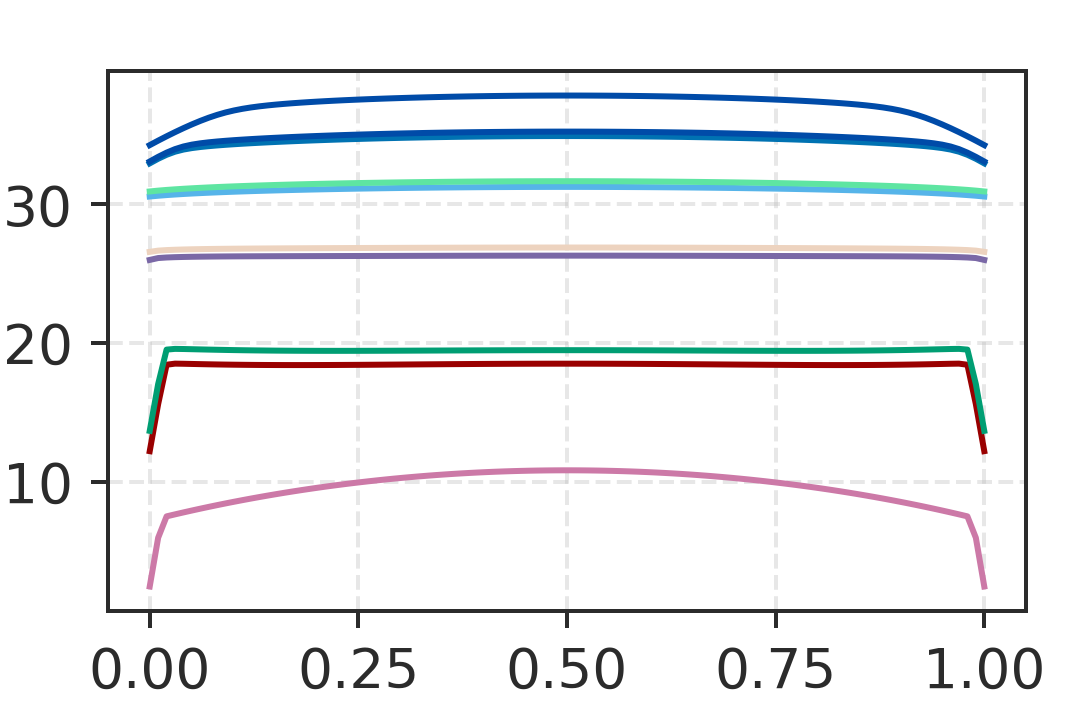

In [13]:
#surface_to_print = simulation_dictionary["1-2"][:,:,0]
surface_to_print = simulation_dictionary_phiplus_phiminus["eigvals"][:,
                                                    :, 1] - simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
i = 0
while i < len(surface_to_print[0]):
    plt.plot(np.linspace(0, 1, len(surface_to_print[i])), surface_to_print[i])
    i += 10
plt.show()

## Transition 01 plots

### 3D plots

<IPython.core.display.Javascript object>


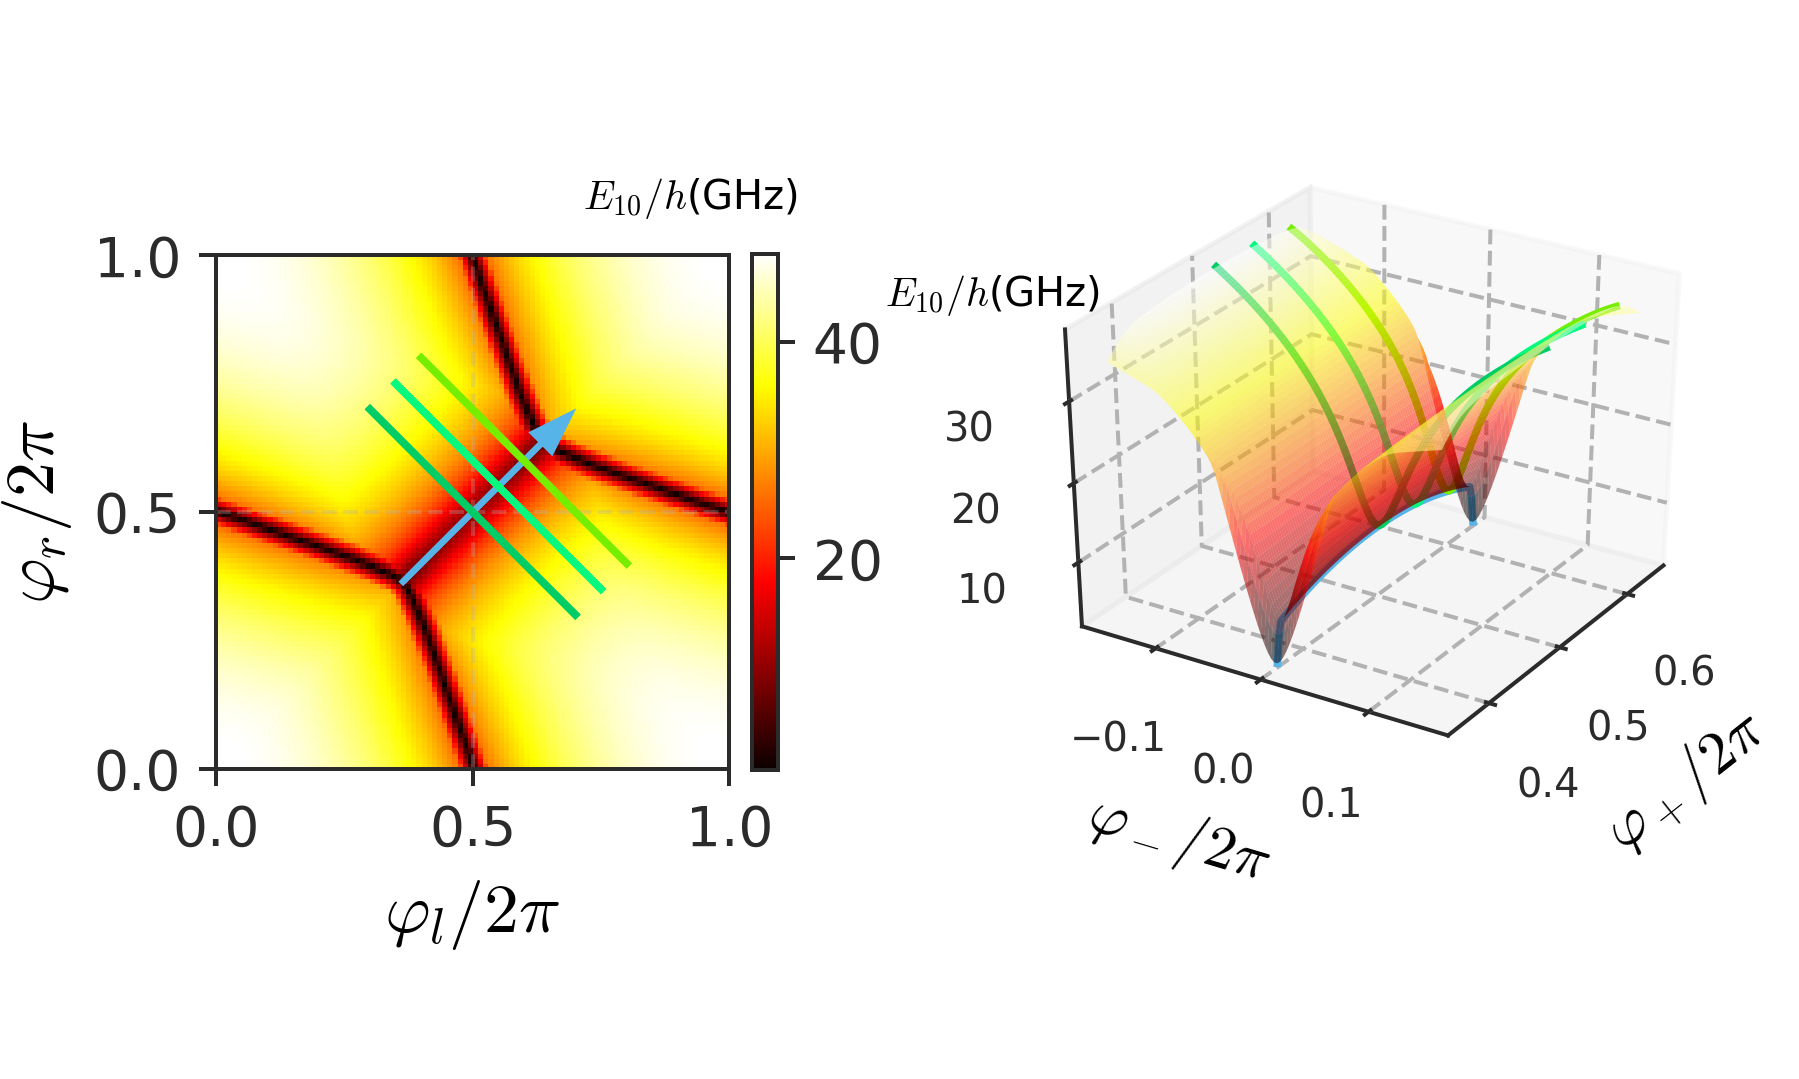

In [166]:
transition_01_phiplus_phiminus = (
    simulation_dictionary_phiplus_phiminus["eigvals"][:,:,1] - 
    simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
)
transition_01_in_phil_phir = (
    simulation_dictionary_phil_phir["eigvals"][:,:,1] -
    simulation_dictionary_phil_phir["eigvals"][:,:,0]
)

fig = plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.12, bottom=None, right=0.9,
                     top=None, wspace=0.5, hspace=1)

ax_2d = fig.add_subplot(1, 2, 1)
im = ax_2d.imshow(
    transition_01_in_phil_phir,
    extent=[LOWER, UPPER, LOWER, UPPER],
    origin='lower',
    cmap=cm.hot,
)
# Annotation
cb = fig.colorbar(im, ax=ax_2d, fraction=0.046, pad=0.04)
cb.ax.set_ylabel(r"$E_{10}/h$(GHz)", fontsize=8,
                 rotation=0, ha="left", labelpad=-60, y=1.15)
ax_2d.set_xticks([0, 0.5, 1])
ax_2d.set_yticks([0, 0.5, 1])
ax_2d.set_xlabel(r"$\varphi_l/2\pi$", fontsize=14)
ax_2d.set_ylabel(r"$\varphi_r/2\pi$", fontsize=14)

(x0, y0, width, height) = ax_2d.get_position().bounds
(w_pad, h_pad, wspace, hspace) = fig.get_constrained_layout_pads()

ax_3d = fig.add_axes([x0 + width + 7 * hspace, y0, width * 1.5, height * 1.2], projection='3d')
grid_x, grid_y = np.meshgrid(phi_plus_list, phi_minus_list)
surf = ax_3d.plot_surface(grid_x / (2*pi), grid_y / (2 * pi),
                          transition_01_phiplus_phiminus,
                          cmap=cm.hot,
                          ccount=100,
                          rcount=100,
                          alpha=0.55,
                          linewidth=0, antialiased=True, edgecolor='red'
                          )

# Annotation
ax_3d.view_init(elev=32, azim=32)
ax_3d.set_ylabel(r"$\varphi_-/2\pi$", fontsize=12)
ax_3d.set_xlabel(r"$\varphi_+/2\pi$", fontsize=12)
ax_3d.set_yticks([-0.1, 0, 0.1])
ax_3d.set_xticks([0.4, 0.5, 0.6])
ax_3d.set_zticks([0, 10, 20, 30])
ax_3d.tick_params(axis='both', which='major', labelsize=8)
ax_3d.zaxis.set_rotate_label(False)
#ax_3d.set_zlabel(r"$E_{10}/h$(GHz)", fontsize=10, rotation=0, labelpad=-10, x=10500)
ax_3d.text(x0, y0 - width * 1.5, 55, r"$E_{10}/h$(GHz)", color='black',fontsize=8)

ax_3d.invert_xaxis()

#### Supplementary lines on 2D plot

In [167]:
def evaluate_endpoints_for_2d_phi_plus_slice(phi_plus_slice: float, length: float) -> Dict:
    """Return a dictionary of the coodinates for a alice in phi_plus"""
    coordinates = {
        "x0": phi_plus_slice - length,
        "x1": phi_plus_slice + length,
        "dx": length,
        "dy": - length
    }
    coordinates["y0"] = phi_plus_slice * 2 - coordinates["x0"]
    coordinates["y1"] = phi_plus_slice * 2 - coordinates["x1"]
    
    return coordinates

In [171]:
phiT0 = 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA) / (2 * pi)
phiT1 = (2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)) / (2 * pi)
ax_2d.arrow(phiT0, phiT0,
            phiT1-phiT0, phiT1-phiT0,
            color='C2', head_width=0.05, head_starts_at_zero=False, linewidth=1.2)

curve2_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.6, 0.2)
ax_2d.plot([curve2_coords["x0"], curve2_coords["x1"]],
           [curve2_coords["y0"], curve2_coords["y1"]],
           color='#76ee00', linewidth=1.5
          )
curve3_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.55, 0.2)
ax_2d.plot([curve3_coords["x0"], curve3_coords["x1"]],
           [curve3_coords["y0"], curve3_coords["y1"]],
           color='#04f97f', linewidth=1.5
)
curve4_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.5, 0.2)
ax_2d.plot([curve4_coords["x0"], curve4_coords["x1"]],
           [curve4_coords["y0"], curve4_coords["y1"]],
          color='#00cd66', linewidth=1.5
          )

#### Supplementary lines on 3D plot

In [169]:
def build_curve_for_phi_plus_value(phi_plus_list: List[float],
                                   phi_minus_list: List[float],
                                   phi_plus_value: float,
                                   evaluated_potential_grid) -> Tuple:
    """Take the phi_plus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_plus_list) if val > phi_plus_value)
    return (
        phi_minus_list / (2 * pi),
        [phi_plus_list[idx] / (2 * pi)] * len(phi_plus_list),
        evaluated_potential_grid[:, idx]
    )

def build_curve_for_phi_minus_value(phi_plus_list: List[float],
                                    phi_minus_list: List[float],
                                    phi_minus_value: float,
                                    evaluated_potential_grid) -> Tuple:
    """Take the phi_minus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_minus_list) if val > phi_minus_value)
    return (
        [phi_minus_list[idx] / (2 * pi)] * len(phi_minus_list),
        phi_plus_list / (2 * pi),
        evaluated_potential_grid[idx, :]
    )

In [170]:
curves = {
    "curve1": build_curve_for_phi_minus_value(phi_plus_list,
                                             phi_minus_list,
                                             0,
                                             transition_01_phiplus_phiminus),
    "curve2": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.6 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve3": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.55 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve4": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.5 * (2*pi),
                                             transition_01_phiplus_phiminus)
}

ax_3d.plot3D(curves["curve1"][1], curves["curve1"][0], curves["curve1"][2],  # c=zdata, cmap='Greens'
             color='C2', linewidth=1.5)
ax_3d.plot3D(curves["curve2"][1], curves["curve2"][0], curves["curve2"][2],  # c=zdata, cmap='Greens'
             color='#76ee00', linewidth=1.5)
ax_3d.plot3D(curves["curve3"][1], curves["curve3"][0], curves["curve3"][2],  # c=zdata, cmap='Greens'
              color='#04f97f', linewidth=1.5)
ax_3d.plot3D(curves["curve4"][1], curves["curve4"][0], curves["curve4"][2],  # c=zdata, cmap='Greens'
             color='#00cd66', linewidth=1.5)

### Save

In [172]:
plotter.save_onto_white_background(ax, "./output/transition_01", "svg")

### Cross section plots

<IPython.core.display.Javascript object>


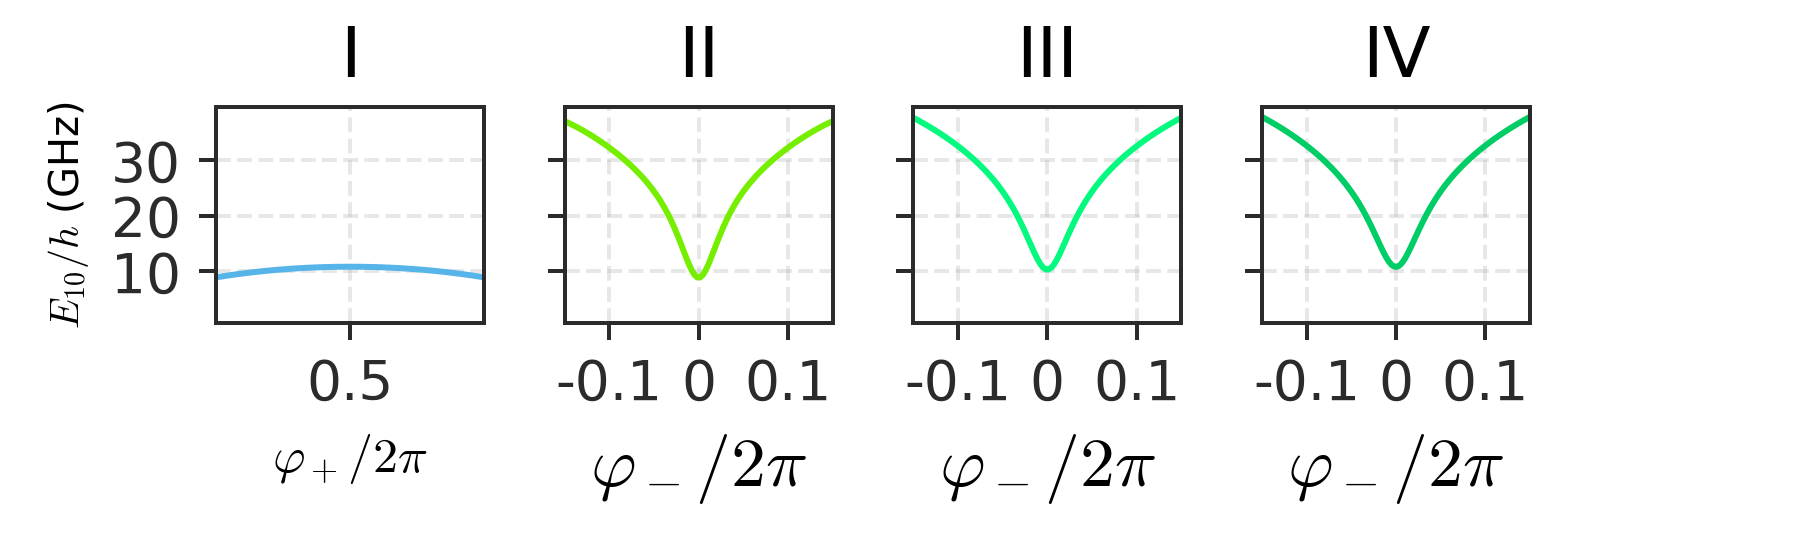

In [162]:
fig, ax = plt.subplots(1, 4, sharex=False, sharey=True, figsize=(5, 1.5))
plt.subplots_adjust(left=0.12, bottom=0.4, right=0.85,
                    top=0.8, wspace=None, hspace=None)

ax[0].plot(curves["curve1"][1], curves["curve1"][2], color="C2")
ax[0].set_title("I", fontsize=14)
ax[1].plot(curves["curve2"][0], curves["curve2"][2], color="#76ee00")
ax[1].set_title("II", fontsize=14)
ax[2].plot(curves["curve3"][0], curves["curve3"][2], color="#04f97f")
ax[2].set_title("III", fontsize=14)
ax[3].plot(curves["curve4"][0], curves["curve4"][2], color="#00cd66")
ax[3].set_title("IV", fontsize=14)

ax[0].set_xticks([-0.5, 0, 0.5, 1, 1.5])
ax[0].set_xlabel(r"$\varphi_+/2\pi$", fontsize=10)
ax[0].set_ylabel(r"$E_{10}/h$ (GHz)", fontsize=8, rotation=90)
ax[0].set_xlim([0.4,0.6])
for i in range(1, 4):
    ax[i].set_xlabel(r"$\varphi_-/2\pi$", fontsize=14)
    ax[i].set_xlim([-0.15, 0.15])
    ax[i].set_xticks([-0.1, 0, 0.1])
    ax[i].set_xticklabels([-0.1, 0, 0.1])

# Transition matrix elements

## Prepare parameters

In [1]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos
import matplotlib.pyplot as plt
plt.style.use("my_official")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

In [8]:
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 3,
    "states_per_island": 9,
}
EC = 13.5
EJ = 91
LOWER = 0
UPPER = 1
MIDPOINT = (UPPER - LOWER) / 2

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, [], logging_level=logging.WARNING, other_parameters="test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

In [3]:
COLOUR_SCHEME = {
    0: "#104e8b",     # dark blue (DodgerBlue4)
    1: "#ed2200",     # dark red (red2)
    2: "#9acd32",     # goldenrod
    3: "#ffc125"      # orange
}
COLOUR_SCHEME["d0-1"]  = COLOUR_SCHEME[0]
COLOUR_SCHEME["d1-2"]  = COLOUR_SCHEME[1]
COLOUR_SCHEME["d2-3"]  = COLOUR_SCHEME[2]
COLOUR_SCHEME["d0-2"]  = "#68838b"  # light steel blue
COLOUR_SCHEME["d0-3"]  = "#6959cd"  # dark purple
COLOUR_SCHEME["d1-3"]  = "#ffa07a"  # pink salmon

## Across $\varphi_-$ 
At $\varphi_+=\pi$

In [9]:
phi_minus_list = np.linspace(
    -0.04 * 2 * pi,
    0.04 * 2 * pi,
    201)
phi_plus_list = np.linspace(0.5 * 2 * pi, 0.5 * 2 * pi, 1)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_plus_list, phi_minus_list, 5, phil_phir_coordinates_supplied=False,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:05


<IPython.core.display.Javascript object>


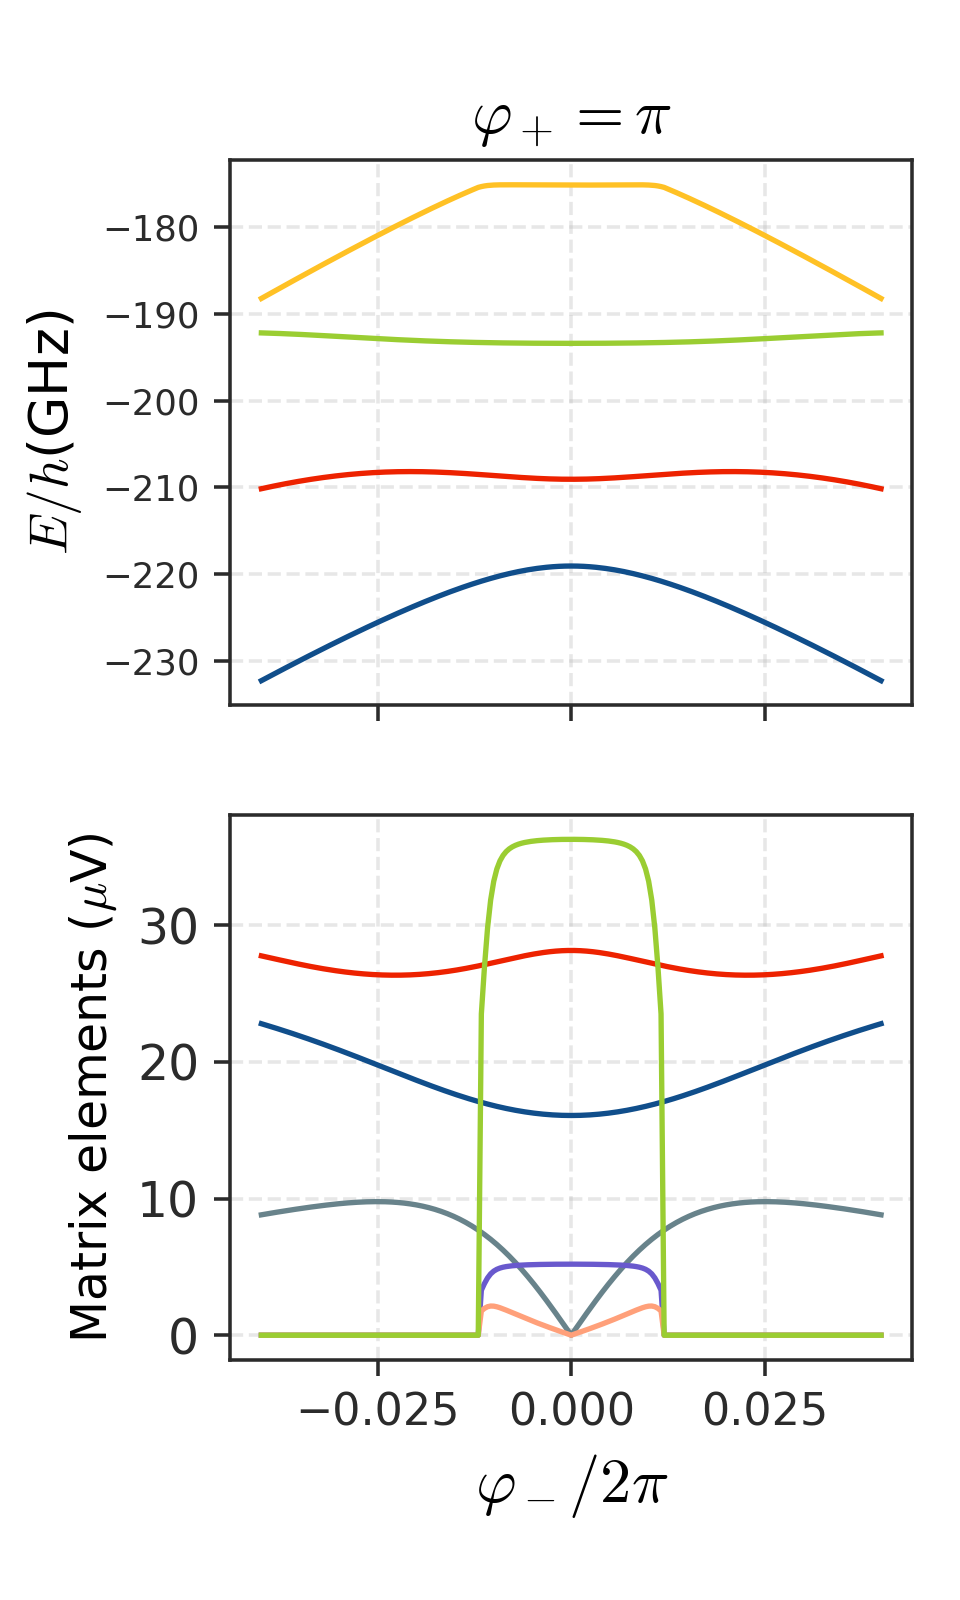

In [12]:
fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.24, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

for idx in [0, 1, 2, 3]:
    ax[0].plot(phi_minus_list / (2 * pi), 
               simulation_dictionary_for_transition_matrix["eigvals"][0, :, idx],
               color=COLOUR_SCHEME[idx]
              )

for idx in [
    "d0-1", "d0-2",
    "d0-3", "d1-2",
    "d1-3", "d2-3"
]:
    ax[1].plot(
        phi_minus_list / (2 * pi),
        4 * simulation_dictionary_for_transition_matrix[
            idx
        ][0, :],
        color=COLOUR_SCHEME[idx]
    )

ax[0].set_title(r"$\varphi_+=\pi$", fontsize=14)
#ax[0].set_xlim([-0.135, 0.135])
#ax[0].set_ylim([-240, -160])

ax[0].set_ylabel(r"$E/h$(GHz)", fontsize=12)

ax[1].set_xlabel(r"$\varphi_-/2\pi$", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=11)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=8)
#ax[0].set_yticks([-160, -180, -200, -220])

plt.show()

#### Save

In [14]:
plotter.save_onto_white_background(ax, "./output/matrix_element_phi_minus", "svg")

## Across $\varphi_+$
> At $\varphi_-=0$

In [17]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_minus_list = np.linspace(0, 0, 1)
phi_plus_list = np.linspace(
    phi_degeneracy[0], phi_degeneracy[1], 
    401)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_plus_list, phi_minus_list, 
    number_of_levels_to_simulate= 5, 
    phil_phir_coordinates_supplied=False,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:13


<IPython.core.display.Javascript object>


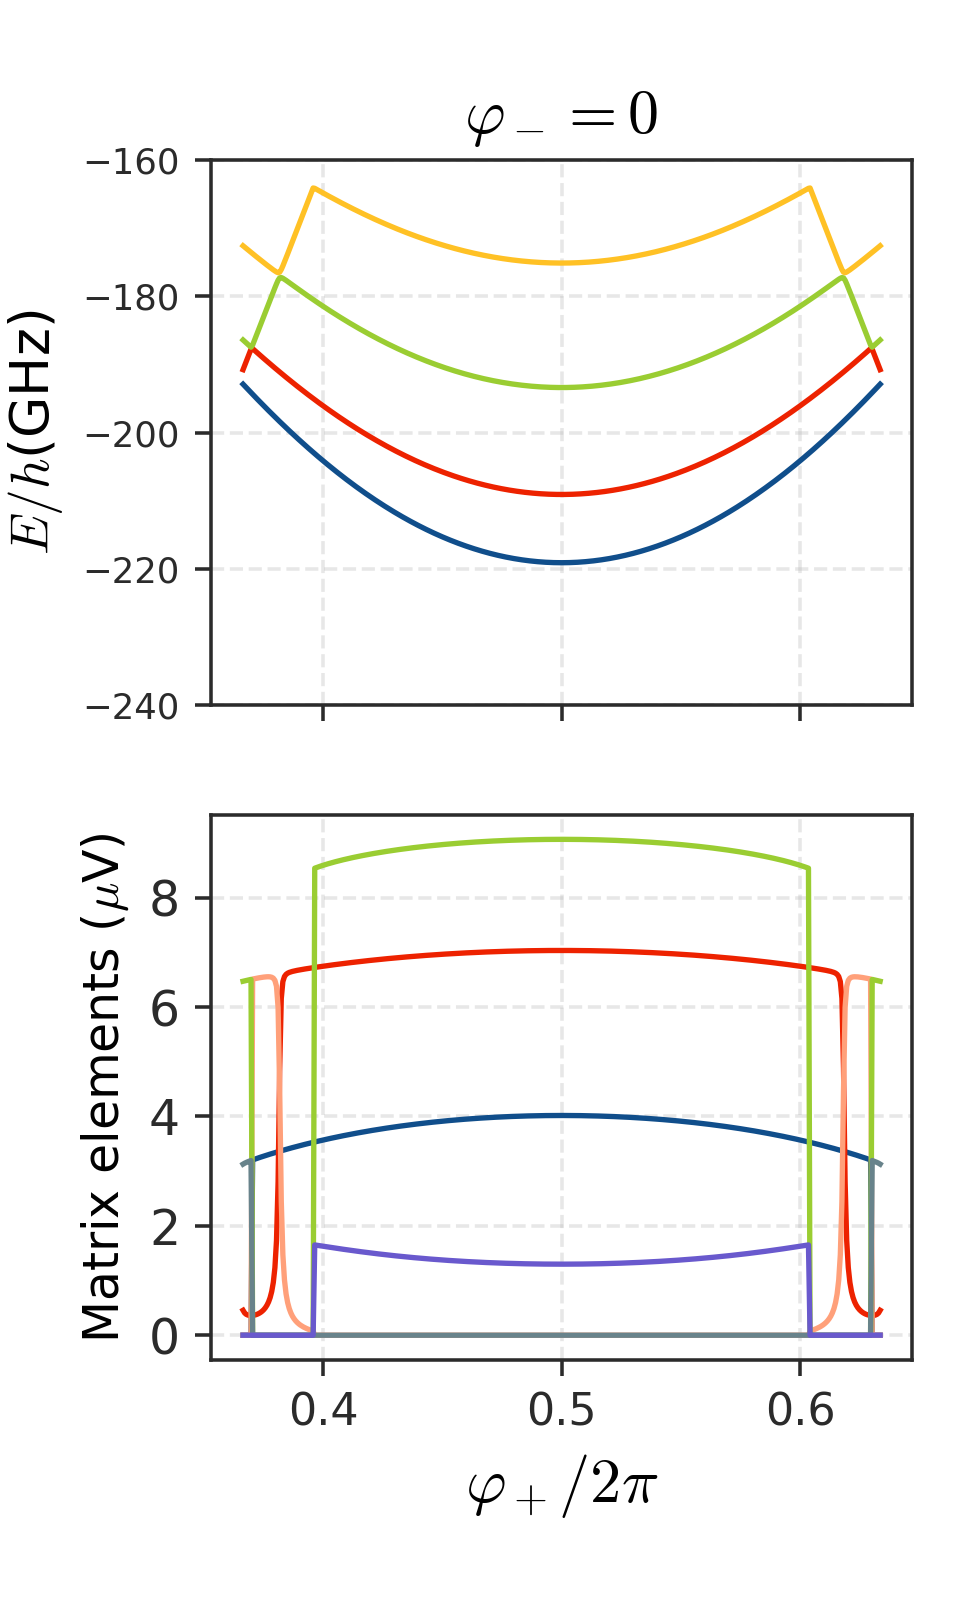

In [21]:
fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.22, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

for idx in [0, 1, 2, 3]:
    ax[0].plot(phi_plus_list / (2 * pi), 
               simulation_dictionary_for_transition_matrix["eigvals"][:, 0,idx],
               color=COLOUR_SCHEME[idx]
              )

for idx in [
    "d0-1", "d1-2",
    "d1-3", "d2-3",
    "d0-2", "d0-3",
]:    
    ax[1].plot(
        phi_plus_list / (2 * pi),
        simulation_dictionary_for_transition_matrix[
            idx
        ][:, 0],
        color=COLOUR_SCHEME[idx]
    )

ax[0].set_title(r"$\varphi_-=0$", fontsize=14)
ax[0].set_ylim([-240, -160])
# ax[0].set_xlim([0.37, 0.63])

ax[0].set_ylabel(r"$E/h$(GHz)", fontsize=12)
ax[1].set_xlabel(r"$\varphi_+/2\pi$", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=11)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=8)
plt.show()

#### Save

In [22]:
plotter.save_onto_white_background(ax, "./output/matrix_element_phi_plus", "svg")

# Local Fluctuations
> Run simulation of energies E_01 when between loop1 and loop 2:
> - Random flux noise
> - Anticorrelated flux noise
>
> And then plot this on histogram

In [6]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 2,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500)
EC = 13.5
EJ = 91
twin_qubit_fluctuation = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_fluctuation.override_parameters(EC=EC, EJ=EJ)

In [7]:
MU = 0.5
SIGMA = 0.01
NUMBER_OF_SIMULATIONS = 10000

twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, 3, condition="ABSENT")
default_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="ANTICORRELATED")
correlated_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="RANDOM")
random_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]

twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        3
condition:                    ABSENT
Example pairs:                (0.5, 0.5)
                              (0.5, 0.5)


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        10000
condition:                    ANTICORRELATED
Example pairs:                (0.5114790247473144, 0.48852097525268556)
                              (0.5020165181867859, 0.49798348181321406)


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:25
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                      

## $\sigma=0.01$

In [20]:
normalised_random_energies = np.array(random_energies) / np.sum(random_energies)
normalised_correlated_energies = np.array(correlated_energies) / np.sum(correlated_energies)

<IPython.core.display.Javascript object>


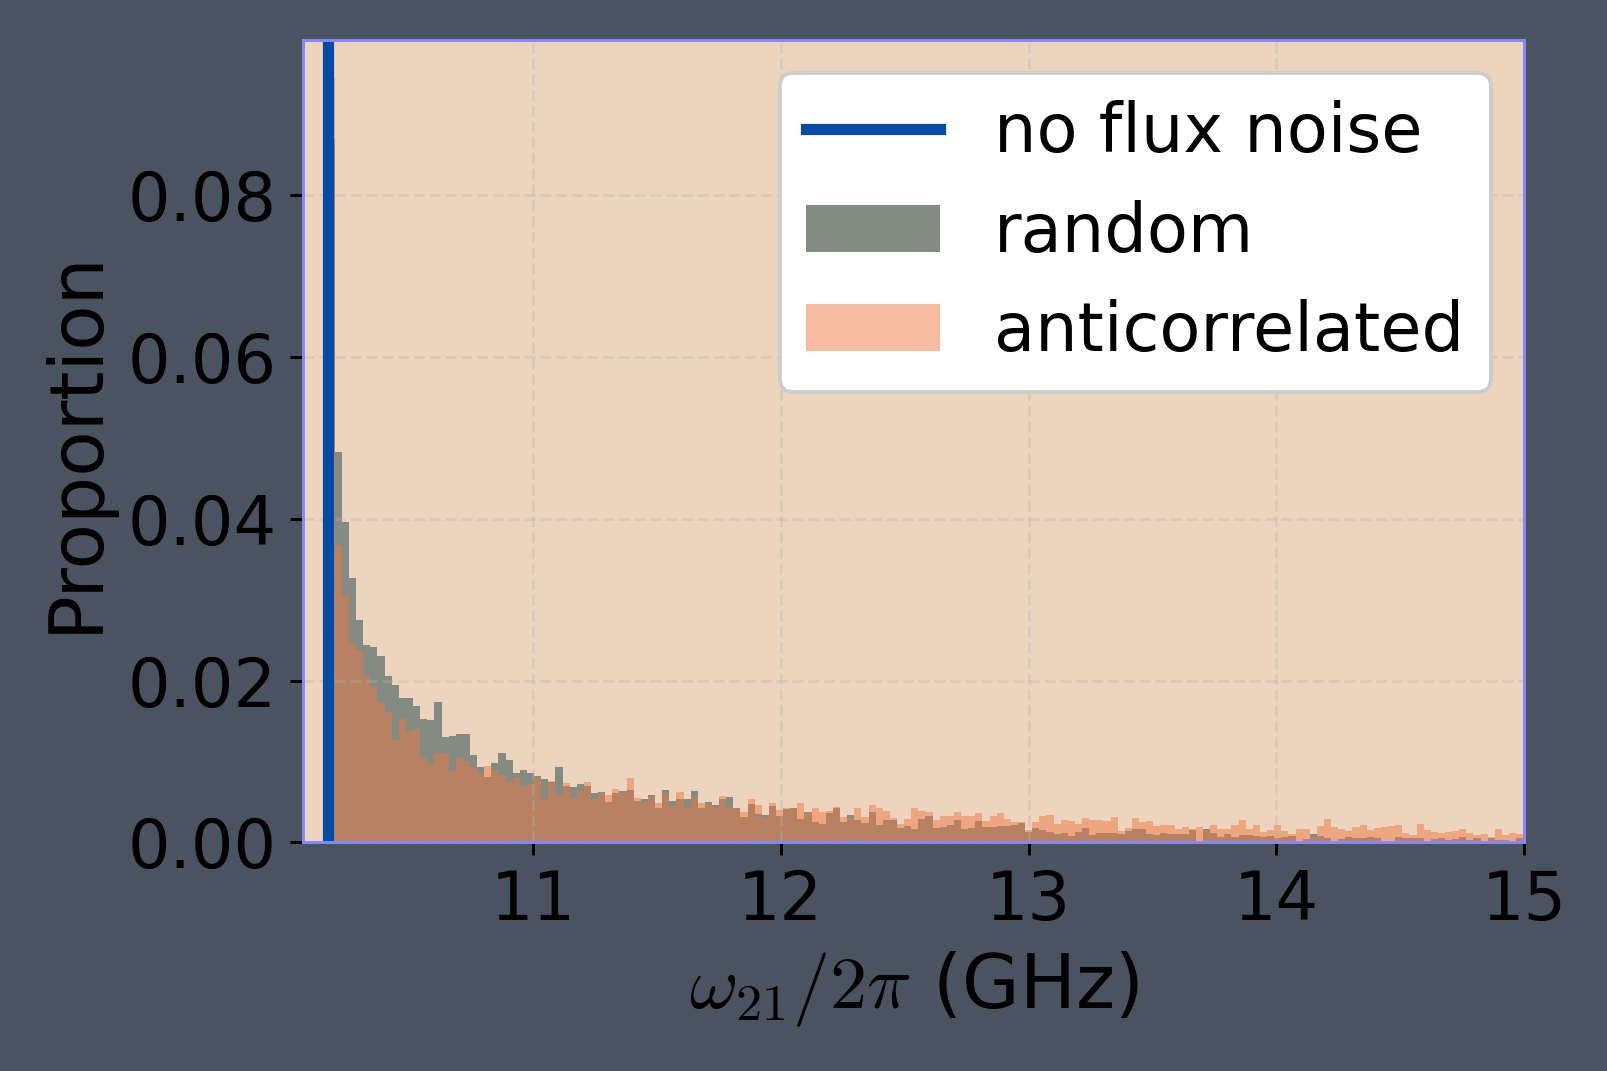

In [26]:
from matplotlib.ticker import PercentFormatter

default_energy = default_energies[0]
BIN_NUMBER = 500
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(MIN_RANGE, MAX_RANGE, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

ax_fluc.hist(random_energies, bins=bins, weights=np.ones(len(random_energies)) / len(random_energies),
             color="#838b83", alpha = 1, label="random")
ax_fluc.hist(correlated_energies, bins=bins, weights=np.ones(len(random_energies)) / len(random_energies),
             color="#ee7942", alpha = 0.5, label="anticorrelated")
ax_fluc.axvline(x=default_energy, linewidth=3.0, label="no flux noise")

ax_fluc.set_xlabel("$\omega_{21}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Proportion")
ax_fluc.tick_params(labelsize=18)
ax_fluc.tick_params(labelsize=18)
ax_fluc.set_xlim([default_energy/1.01, 15])
ax_fluc.legend(fontsize=18, facecolor='white', framealpha=1)

plt.tight_layout()
plt.show()

In [27]:
plt.savefig(f"./output/local_fluctuations.svg", transparent=True)

## $\sigma=0.001$

<IPython.core.display.Javascript object>


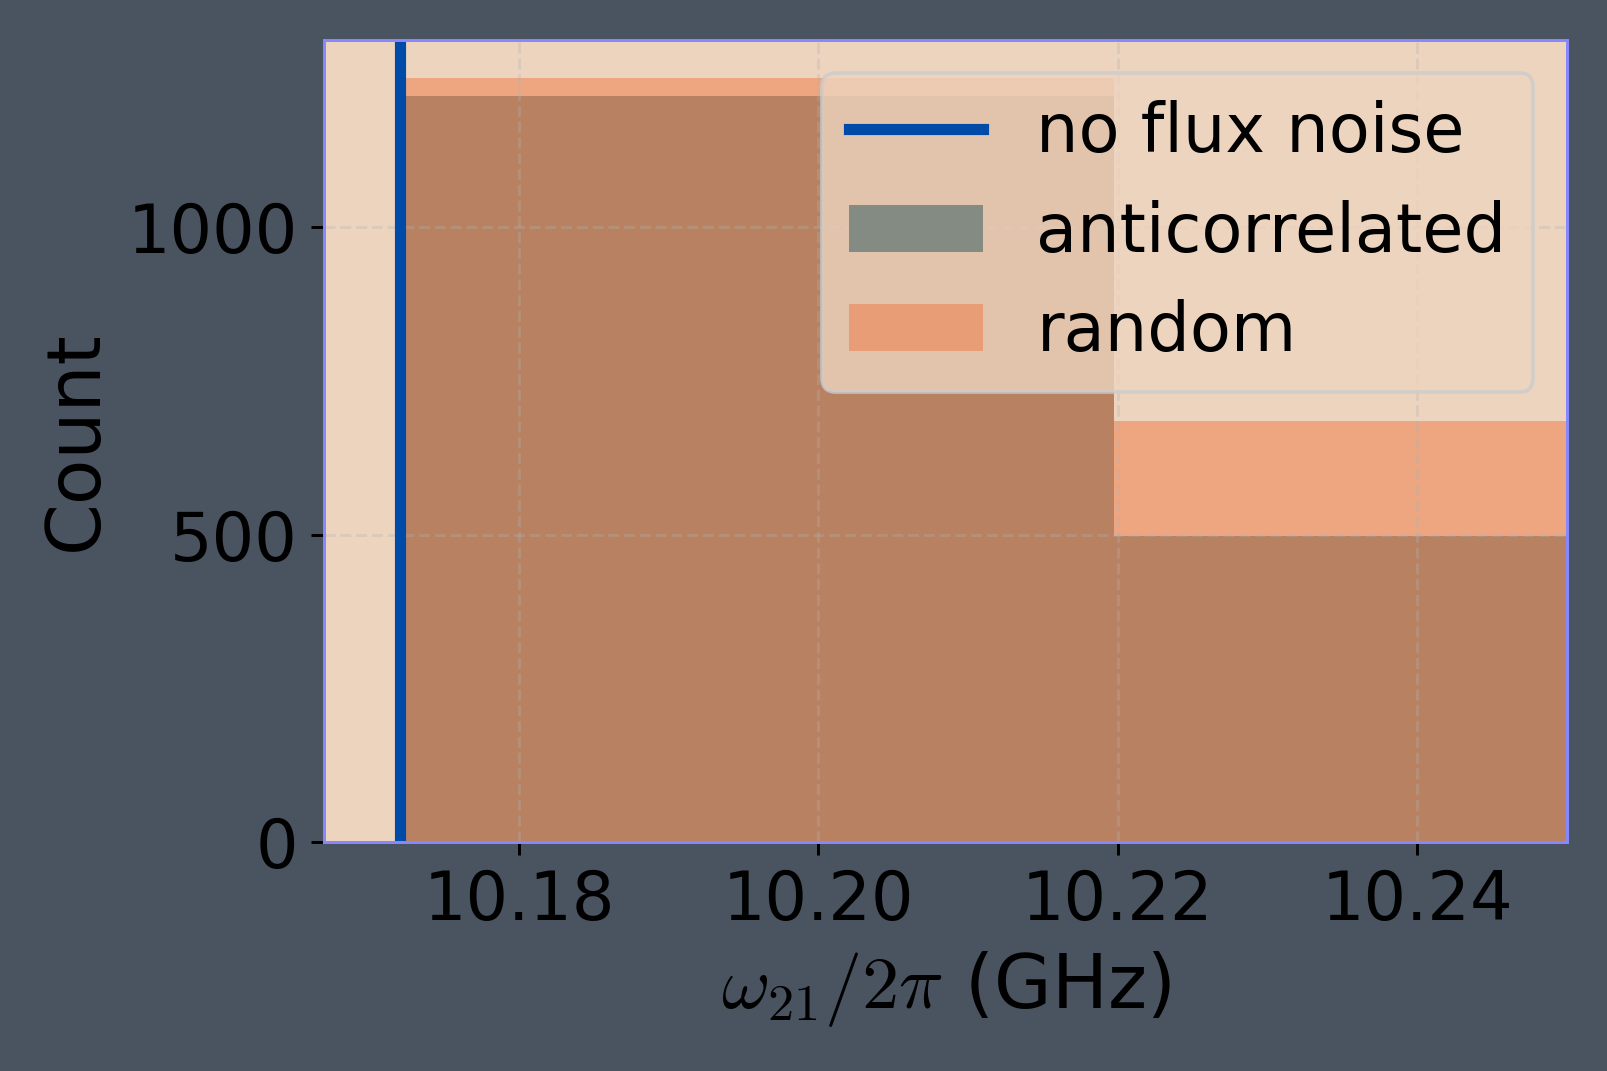

In [110]:
default_energy = default_energies[0]
BIN_NUMBER = 250
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(MIN_RANGE, MAX_RANGE, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

(count_correlated, bins_correlated, _) = ax_fluc.hist(correlated_energies, bins=bins, color="#838b83", alpha = 1.0, label="anticorrelated")
(count_random, bins_random, _) = ax_fluc.hist(random_energies, bins=bins, color="#ee7942", alpha = 0.5, label="random")
ax_fluc.axvline(x=default_energy, linewidth=3.0, label="no flux noise")

ax_fluc.set_xlabel("$\omega_{21}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Count")
ax_fluc.tick_params(labelsize=18)
ax_fluc.tick_params(labelsize=18)
ax_fluc.set_xlim([default_energy/1.0005, 10.25])
ax_fluc.legend(fontsize=18)

plt.tight_layout()
plt.show()

In [112]:
plt.savefig(f"./output/local_fluctuations.svg", transparent=True)